# INN Hotels Project

**INDEX**


*1. Importing necessary libraries and data

*2. Data overview

      2.1 Changing object type into category type.
    
3. Exploratory data analysis (EDA)

       3.1 Univariate analysis
    
    I. Stats summary
    
    II. Categorical variables
        a. Variable 'type_of_meal_plan

        b. Variable room_type_reserved
        
        c. Variable market_segment_type

        d. Variable booking_status
        
   III. Numeric variables

            e.Variable no_of_adults
    
            f.Variable no_of_children
        
            g.Variable no_of_weekend_nights
            
            h.Variable no_of_week_nights
            
            i. Variable required_car_parking_space
            
            j.Variable lead_time
            
            k.Variable arrival_year
            
            l. Variable arrival_month
            
            m.Variable arrival_date
            
            n.Variable repeated_guest
            
            o.Variable no_of_previous_cancellations
            
            p.Variable no_of_previous_bookings_not_canceled
            
            q.Variable avg_price_per_room
            
            r.Variable no_of_special_requests
            
3.2 Bivariate analysis

            a. number of request vs booking status
            
            b. price vs booking status
            
            c. price vs number_request
            
            d. price vs segment
            
            e. booking status and lead time
            
            f. repeat_guest vs booking_cancel
            
            g. booking per month
            
            h. bookings canceled per month
            
            i. price per month
            
            j. families in the hotel
            
            l. segment market vs type of room
            
            m. segment market vs number of request
            
            4.Data preprocessing
            
            1.Checking and treating outliers
            
            2. Feature engineering
            
            3.EDA after variable transformation
            
            * Plotting price per room after outliers’ treatment
            
            * Preparing data for modeling
            
A. Building a logistic regression model

- Checking multicollinearity

- High p_values

- Performance model1 (default threshold= 0.5)

-Changing coefficient to odds

-Improving the model: ROC-AUC curve approach
    
-Precision-Recall curves approach

-Final model summary

-Model performance comparison for the three possible thresholds performance

B. building a decision tree model

-Model tree1 performance

-Pre-pruning

-Post pruning/ cost complexity

-Model performance comparison and conclusions for model tree1, model estimator and best model

ACTIONABLE INSIGHTS

RECOMMENDATIONS






## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## 1. Importing necessary libraries and data

In [10]:
# to improve the visualization
%reload_ext nb_black
# To operate with python and coding
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# to split data in test and train
import sklearn
from sklearn.model_selection import train_test_split


# to create logistic regression model
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression

# To create a decision tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# For the pre_pruning tree process to create cross validation evaluation.
from sklearn.model_selection import GridSearchCV

# to make the tree model readable
from sklearn.feature_extraction.text import CountVectorizer

# to check performance of the models and scores

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# To suppress warnings


import warnings

warnings.filterwarnings("ignore")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
# limit the view of the dataset
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# import data set
df_0 = pd.read_csv(r"C:\Users\charo\Downloads\INNHotelsGroup.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# pre-visualization of first rows the data
df_0.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
# pre-visualization of first rows the data
df_0.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 2.Data Overview

- Observations
- Sanity checks

In [14]:
#making a copy of the data
df=df_0.copy()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# checking number of rows and columns of the dataset.
d_r = df.shape[0]
d_c = df.shape[1]
print(f"The data set contains {d_r} rows and {d_c} columns")

The data set contains 36275 rows and 19 columns


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# checking for duplicate values
df.duplicated().any()

False

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are not duplicates in the database.

In [17]:
# checking for null values
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There are not null values in the data.

In [18]:
# checkin data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see that we have different types of data. After checking the variables data type, we can see that there are 5 variables that are 'objects' and there the rest are numeric.
In order to operate with these variables for the analysis, we will need to change the 'object' data type variables into 'categories'.


#### 2.1 Changing object type into category type.

In [19]:
# list of columns to convert into categories
cols_cat = [
    "Booking_ID",
    "type_of_meal_plan",
    "room_type_reserved",
    "market_segment_type",
    "booking_status",
]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# changing data type of the variables

for i in cols_cat:
    df[i] = df[i].astype("category")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Booking_ID                            36275 non-null  category
 1   no_of_adults                          36275 non-null  int64   
 2   no_of_children                        36275 non-null  int64   
 3   no_of_weekend_nights                  36275 non-null  int64   
 4   no_of_week_nights                     36275 non-null  int64   
 5   type_of_meal_plan                     36275 non-null  category
 6   required_car_parking_space            36275 non-null  int64   
 7   room_type_reserved                    36275 non-null  category
 8   lead_time                             36275 non-null  int64   
 9   arrival_year                          36275 non-null  int64   
 10  arrival_month                         36275 non-null  int64   
 11  ar

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All the variables are either categories or numeric, either intergers or float type. We can operate with this dataset.

## 3. Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?**Section III Numeric variables(L)**
2. Which market segment do most of the guests come from?**Section II Categorical variables(c)**.
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?**Section 3.Bivariate analysis(d)**
4. What percentage of bookings are canceled? **Section II Categorical variables(d)**.
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**Section III Numeric variables(p and n)**
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?**Section 3.Bivariate analysis(a)**

### 3.1 Univariate Analysis

###  I. stats summary

In [22]:
# checking for the number ID to see if match user id.
df["Booking_ID"].value_counts().sort_values(ascending=False)

INN00001    1
INN00007    1
INN00070    1
INN00009    1
INN00003    1
           ..
INN36262    1
INN36261    1
INN36267    1
INN36242    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

This variable is not giving us any additional information so we do not need it for the next steps. We can drop it from the dataset.

In [23]:
df = df.drop(["Booking_ID"], axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# checking that Booking_ID was removed from the data.
df.select_dtypes("category").columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
"""Checking for the different values in each categorical variable by using a for loop, and expressing the 
frequency in percentage."""
col_cat2 = df.select_dtypes("category").columns
for i in col_cat2:
    col_count = df[i].value_counts(normalize=True) * 100
    print(f"{np.round(col_count,2)}", "\n")

Meal Plan 1     76.73
Not Selected    14.14
Meal Plan 2      9.11
Meal Plan 3      0.01
Name: type_of_meal_plan, dtype: float64 

Room_Type 1    77.55
Room_Type 4    16.70
Room_Type 6     2.66
Room_Type 2     1.91
Room_Type 5     0.73
Room_Type 7     0.44
Room_Type 3     0.02
Name: room_type_reserved, dtype: float64 

Online           63.99
Offline          29.02
Corporate         5.56
Complementary     1.08
Aviation          0.34
Name: market_segment_type, dtype: float64 

Not_Canceled    67.24
Canceled        32.76
Name: booking_status, dtype: float64 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# statistical summary of the data for categorical variables
df.describe(include="category").T

count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations:

After some analysis we can see that there are 3 different meal plans and the Plan1 is the most preferred; 14% of the bookers do not choose any meal plan. Full meal plan is hardly ever chosen by clients.
Type_1 room is the one preferred by customers, this type of room is booked the 77.5% of the time, followed by type_4.
In regards with the market segment of bookings, the online booking is the most frequent (63% of the times) and the corporate is minimal (only 5%), so we can assume the hotel current customer segment is vacation/leisure.
From the reservation status, we can see that customers cancel 1 out of every 3 booking, so It is critical for the hotel to manage this situation.


In [27]:
# statistical summary of the data for numeric variables
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
# Checking different values for the numeric variables of the dataset.
int_col = df.select_dtypes(np.number).columns
for i in int_col:
    col_count = df[i].value_counts(normalize=True) * 100
    print(f"{np.round(col_count,3)}", "\n")
    pd.set_option("display.max_rows", 8)

2    71.972
1    21.213
3     6.387
0     0.383
4     0.044
Name: no_of_adults, dtype: float64 

0     92.562
1      4.460
2      2.917
3      0.052
9      0.006
10     0.003
Name: no_of_children, dtype: float64 

0    46.511
1    27.553
2    25.006
3     0.422
4     0.356
5     0.094
6     0.055
7     0.003
Name: no_of_weekend_nights, dtype: float64 

2     31.548
1     26.156
3     21.610
4      8.243
       ...  
14     0.019
13     0.014
17     0.008
16     0.006
Name: no_of_week_nights, Length: 18, dtype: float64 

0    96.901
1     3.099
Name: required_car_parking_space, dtype: float64 

0      3.575
1      2.972
2      1.773
3      1.737
       ...  
353    0.003
328    0.003
352    0.003
351    0.003
Name: lead_time, Length: 352, dtype: float64 

2018    82.043
2017    17.957
Name: arrival_year, dtype: float64 

10    14.657
9     12.711
8     10.511
6      8.830
       ...  
5      7.162
3      6.500
2      4.697
1      2.795
Name: arrival_month, Length: 12, dtype: float64 

1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
pd.set_option(
    "display.max_rows", 200
)  # we return to the previous setup to improve the visualization.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observations:

- Number of adults: The average customer profile are couples, and in very rare occasion, a maximum of 4 adults booked a room, could be families with older kids (young adults above 18 years old) spending vacation time together, it will show as outliers since the third percentile is the half of the maximum number.
-Number of children: most of the clients do not have children with them during their stay in the hotel. We also can see that there are some outliers with a maximum of 10 children, it could be a young sport team that stayed in the hotel under adults’ supervision. So, this variable is also right skewed.
-When checking the number of weekends nights, the median customer only stayed for 1 weekend, for the third percentile we can see that two weekends is the most common pattern, and we have outliers since we can see that some guests stayed up to 7 weekends.
-In regards with the number of weeknights, most of the guest will stay one weekday, possibly Friday or Monday, we will need to check that. When comparing the third percentile, with 3 nights stay, against the maximum value of the distribution which is 17 weeknights, it is obvious that this distribution is right skewed.
-Most of the guests did not request parking space, maybe the hotel was situated in a well communicated area, near the airport or train station.
- In regard with the lead time, days between the date of booking and the arrival date, the number range goes from 0 days, that means the guest booked last minute to 443 days, what is about 14 months ahead of time. When reading the median customer would book about 2 months ahead of their stay. Again we can see outliers on the distribution, since the 75% of the lead time of the customer tend to be 4 months(126 days) and there are bookings with a value of that exceed the third percentile by 10 months; we can assume those customer may be travelling from very far locations, possibly different continents.
- About the year, we can see the information collected is from 2017 and 2018.
-The hotel is receiving guests during all the seasons, but the mostly from end of July and beginning of August to October, being October the month with higher number of bookings. September and October is not high season so customer may prefer to enjoy vacation a bit later and take advantage of better prices.
-Middle of the month is the data preferred by customers, still the different in percentage, in comparison with other dates, is not relevant.
- Most of the guest just stay once in the hotel, so the customer loyalty is very low. Only 2% of the guests are recurrent customers.
-The average customer does not have previous cancellations, and there is a 1% of them that have cancelled once or even more times (up to 13 times).
-Also, only a small percentage did repeat their stay at the hotel. The loyal customers will be considered as outliers for the 'no_of_previous_bookings_not_canceled' distribution, with a maximum of 58 times. But unfortunately, this does not seem to be the average behavior.
-The average price per room is around 100 euro per night. We need additional analysis of the price distribution since the prices are very likely to change based of the month or the season. The price range is very wide, with a minimum price of 0 euro to a maximum of 540 euros per room, that must be during the summer season. The price distribution is highly skewed. We need to do some research to understand both extreme values, especially the 0 Euro per night.
- Most of the customers do not have any special requests but a 46% of the guests have one or more request. About 30% of the guests have only one request, that could be as simple as asking for a silent room, or parking space. The maximum number of requests is five. We do not know if this hotel offers airport shuttle service as well so this could be another service marked as request.


### II. categorical variables

In [30]:
# categorical variable of the dataset
df_cat = df.describe(include="category")
list_cat = df_cat.columns.tolist()
list_cat

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### a. Variable 'type_of_meal_plan'

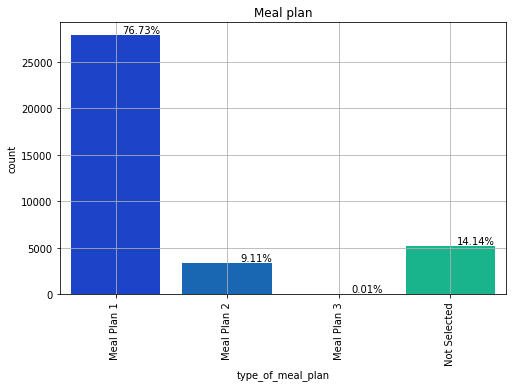

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="type_of_meal_plan", palette="winter"
)  # we are using countplot for categorical values
plt.xticks(rotation=90)
plt.grid()  # grid will help visualization
plt.title("Meal plan")
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="right", va="bottom", fontsize=10)
plt.show()

We can notice that the meal plan 1, the breakfast included, is the one selected the most; a very few people are interested in the full board, and it makes sense since tourists like to experience different type of cuisine and restaurants during their visits to Portugal.
A great number of custormers,14%, do not plan their meals service ahead, so we can consider they are having their meals somewhere else.


#### b.Variable room_type_reserved

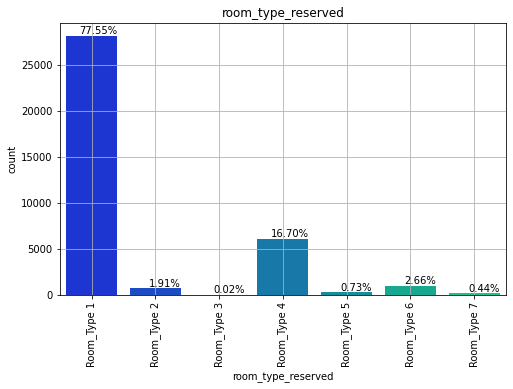

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="room_type_reserved", palette="winter"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("room_type_reserved")
plt.xticks(rotation=90)  # to read the x label
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha="right", va="bottom", fontsize=10)
plt.show()


Room type one is the preferred by customer, followed by type 4. Rooms Type 3, type 5 and type 7 represent a very low percentage of the total.
 

#### c. Variable market_segment_type

#### Which market segment do most of the guests come from?

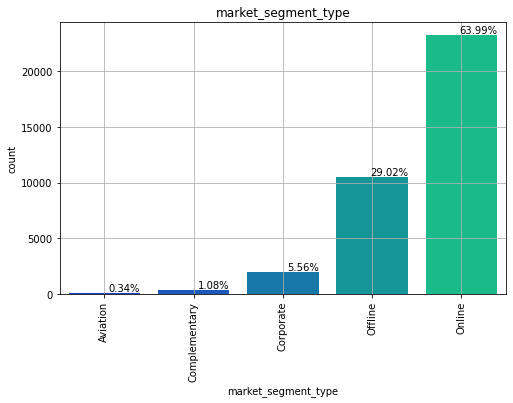

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="market_segment_type", palette="winter"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("market_segment_type")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

There are 5 possible segments, and they mostly seem to be leisure/vacation oriented. The corporate bookings are minimal (only 5%), and most of the guests book their vacation online.
Some other seems to book offline, those are reservation managed by the hotel directly. The offline bookings represent the 29% of the data.


#### d.Variable booking_status

#### What percentage of bookings are canceled?

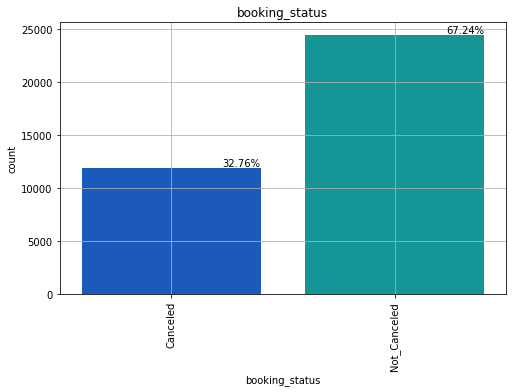

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [34]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="booking_status", palette="winter"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("booking_status")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()


From the data, we can see that our target, booking_status, is showing a high rate of cancellations. Out of the total amount of bookings registered between 2017 and 2018, close to 25000 booking, more than the 30% were cancelled, creating a high opportunity cost and operational cost to the hotel.Because the variable booking status is our target, in order to use it for the modelling we are replacing their values to create a binary variable of ceros and ones.
Let's encode Canceled bookings to 1 and Not_Canceled as 0 for further analysis.

Canceled=1

Not_canceled=0




In [35]:
# using the replace method to change the values
df["booking_status"] = df["booking_status"].replace(
    ["Canceled", "Not_Canceled"], [1, 0]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [36]:
# checking the changes
df["booking_status"].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

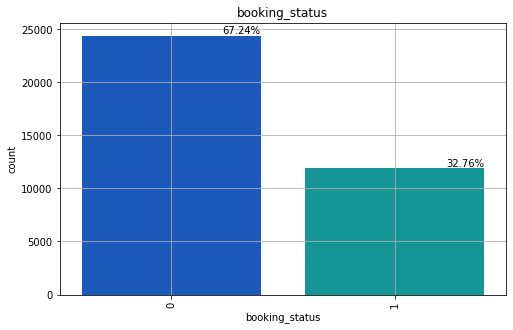

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="booking_status", palette="winter"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("booking_status")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

### III. Numeric variables

In [38]:
# Numerical variables of the dataset
df.select_dtypes(np.number).columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### e.Variable no_of_adults

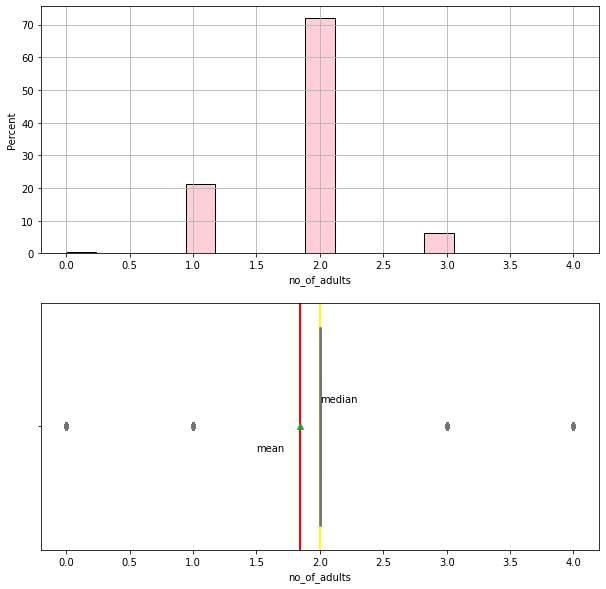

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [39]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df["no_of_adults"], stat="percent", color="pink")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df, x=df["no_of_adults"], showmeans=True, linewidth=2.5, palette="spring"
)
plt.axvline(x=2, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=1.84, linewidth=2, color="red")  # we draw the mean value
plt.text(x=2, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=1.5, y=0.1, s="mean")
plt.show()

In [40]:
sub_adult = df[df["no_of_adults"] < 1]
sub_adult.head(3)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
32              0               2                     0                  3   
287             0               2                     2                  2   
653             0               2                     1                  2   

    type_of_meal_plan  required_car_parking_space room_type_reserved  \
32        Meal Plan 1                           0        Room_Type 2   
287       Meal Plan 1                           0        Room_Type 1   
653       Meal Plan 1                           0        Room_Type 2   

     lead_time  arrival_year  arrival_month  arrival_date market_segment_type  \
32          56          2018             12             7              Online   
287         68          2018              4            24              Online   
653         78          2018              8            19              Online   

     repeated_guest  no_of_previous_cancellations  \
32                0                             0   
287               0                             0   
653               0                             0   

     no_of_previous_bookings_not_canceled  avg_price_per_room  \
32                                      0               82.44   
287                                     0              108.38   
653                                     0              115.68   

     no_of_special_requests  booking_status  
32                        1               0  
287                       1               1  
653                       1               0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


We can see that 70 per cent of the bookings are made for two adults, so more likely, we are referring to a couple.  There are other scenarios, that appear as outliers, but it may not be outliers but a different type of customer. 
There are small groups of three, it may be groups of friends (3 or 4 people) that book a room to spend vacation together. This type of behavior is more common in younger people that do not want to spend the price of an individual room or families with older children, eighteen or above, that book an only room to share.
The value zero is actually giving us a misleading interpretation, basically it refers to rooms that are booked and used by underage people (it could be related to a school trip or team/sport competition event).


#### f.Variable no_of_children

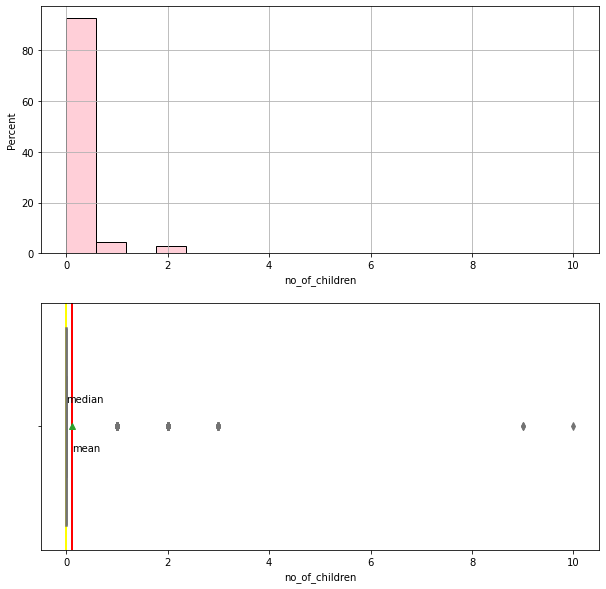

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df["no_of_children"], stat="percent", color="pink")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df, x=df["no_of_children"], showmeans=True, linewidth=2.5, palette="spring"
)
plt.axvline(x=0, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=0.11, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=0.11, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

In [42]:
# Checking families with more than 3 kids
df[df["no_of_children"] > 3]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
6338              2              10                     0                  2   
10041             1               9                     2                  1   
10061             2               9                     2                  5   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
6338        Meal Plan 1                           0        Room_Type 4   
10041       Meal Plan 1                           0        Room_Type 1   
10061       Meal Plan 1                           0        Room_Type 2   

       lead_time  arrival_year  arrival_month  arrival_date  \
6338          37          2018              1            12   
10041         11          2017             10            11   
10061          8          2017              8            13   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
6338               Online               0                             0   
10041           Corporate               0                             0   
10061              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
6338                                      0               84.45   
10041                                     0               95.00   
10061                                     0               76.50   

       no_of_special_requests  booking_status  
6338                        1               0  
10041                       0               0  
10061                       1               1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Almost 90% of the guests are adults with no children,so that is why this variable distribution is highly skewed. There is a small percentage (around 8%), that bring their children to their vacation. Most of those times (4%) the room is only occupied by one child or two children (2% of the total). In rare occasions we can see a couple of bigger groups but most likely they may be taking part of a  group sport event/ competition or school trip, or even bigger families. In order to use the information in the model,considering the small number of groups with more than 3 kids, we are going to assign them the number 3 for analysis purpose.

In [43]:
#assigning values to the bigger groups of kids.
df["no_of_children"] = df["no_of_children"].replace([9, 10], 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
# checking the replacement
sub_child_greater3 = df["no_of_children"] > 3
sub_child_greater3.sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### g.Variable no_of_weekend_nights

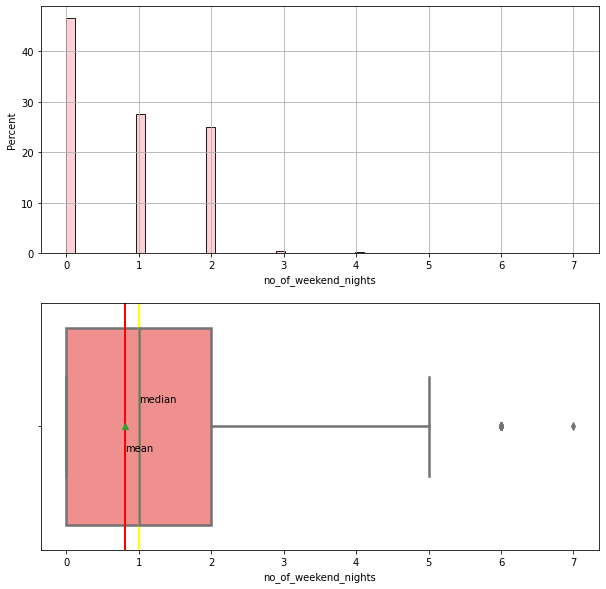

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df["no_of_weekend_nights"], stat="percent", color="pink")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df["no_of_weekend_nights"],
    showmeans=True,
    linewidth=2.5,
    palette="spring",
)
plt.axvline(x=1, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=0.81, linewidth=2, color="red")  # we draw the mean value
plt.text(x=1, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=0.81, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

The average number of weekend nights is 1, so it means that about the half of the customer only stay in the hotel one night of the weekend, usually more expensive that the weeknights.
This behavior is showing in a right skewed distribution and also, we can see some outliers, customers that decided to have a longer stay and spent up to 6 or 7 nights in the hotel. Most likely, we are referring to people that come for oversees, or far countries.


#### h.Variable no_of_week_nights

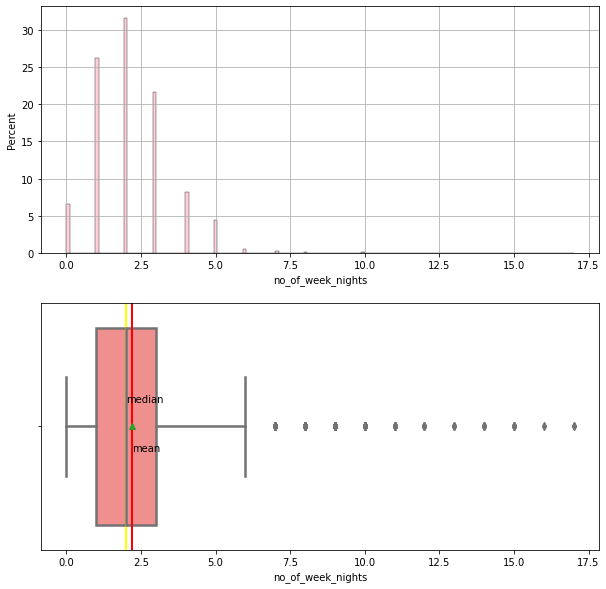

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df["no_of_week_nights"], stat="percent", color="pink")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df, x=df["no_of_week_nights"], showmeans=True, linewidth=2.5, palette="spring"
)
plt.axvline(x=2, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=2.2, linewidth=2, color="red")  # we draw the mean value
plt.text(x=2, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=2.2, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

We can see a similar behavior than in the no_of_weekend_nights distribution, with an average of 2 or three weeknights. In this case, the distribution is almost normally distributed. With outliers on the upper extreme, with a maximum of 17 nights spent in the hotel. Again, as in the previous analysis, this data may correspond to long distance travelers. 

#### i. Variable required_car_parking_space

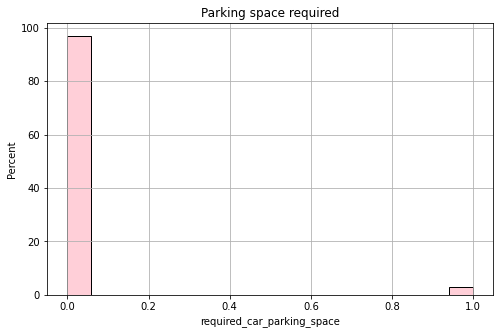

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [47]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(data=df, x=df["required_car_parking_space"], stat="percent", color="pink")
# plotting a histogram to create a bar graph
plt.title("Parking space required")  # Add title
plt.grid()  # add grid
plt.show()

Since this variable is binary, it makes no sense to plot a boxplot since the values that belong to the class 0 (no parking required) will be treated as median and the rest will be consider outliers. In this case the interpretation is different.
Most of the customers will not require parking place because the hotel may have good public transportation or may offer shuttle service. Most of the customer must have their residence in a far location.


#### j.Variable lead_time

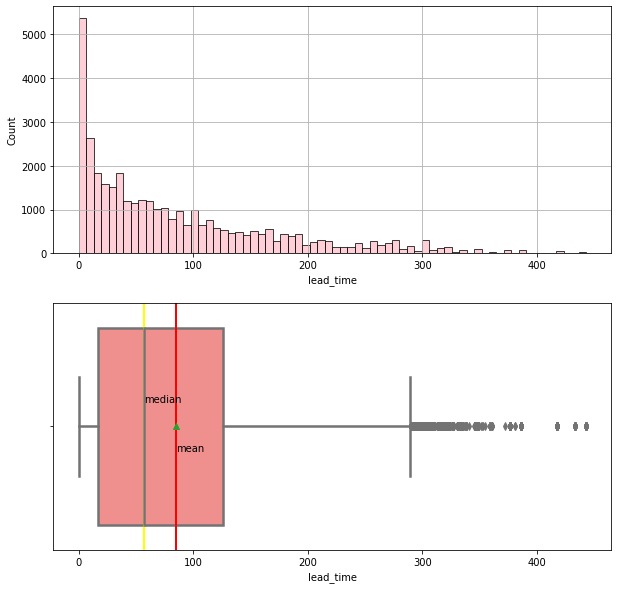

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(data=df, x=df["lead_time"], stat="count", color="pink")
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(data=df, x=df["lead_time"], showmeans=True, linewidth=2.5, palette="spring")
plt.axvline(x=57, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=85.23, linewidth=2, color="red")  # we draw the mean value
plt.text(x=57, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=85.23, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

The lead time distribution is highly right skewed. The median customer would book with a lead date of 57 days but there are also many customers that book within the same day. It may be last minute plans for local visitors. We also see lots of outliers on the upper whisker of the distribution. It may be showing the behavior of the international or long-distance visitors, that need to assure a hotel for a longer period.

#### k.Variable arrival_year

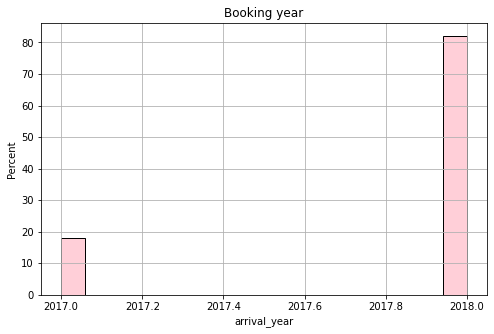

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [49]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(data=df, x=df["arrival_year"], stat="percent", color="pink")
# plotting a histogram to create a bar graph
plt.title("Booking year")  # Add title
plt.grid()  # add grid
plt.show()

In [50]:
df.groupby("arrival_year")["arrival_month"].value_counts()

arrival_year  arrival_month
2017          10               1913
              9                1649
              8                1014
              12                928
              11                647
              7                 363
2018          10               3404
              6                3203
              9                2962
              8                2799
              4                2736
              5                2598
              7                2557
              3                2358
              11               2333
              12               2093
              2                1704
              1                1014
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As we can see, the dataset information is misleading, we only have 6 months information from 2017 and 12 months for 2018, It is difficult to compare the data if we do not separate the information in months. Only 20% of the data belong to 2017, the rest of the data information is from 2018.

#### L. Variable arrival_month

 #### What are the busiest months in the hotel?

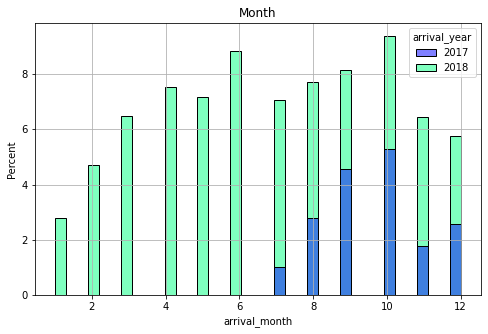

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(
    data=df,
    x=df["arrival_month"],
    stat="percent",
    hue="arrival_year",
    palette="winter",
)
# plotting a histogram to create a bar graph
plt.title("Month")  # Add title
plt.grid()  # add grid
plt.show()

In the case of the month of arrival, because of the limited information we had for 2017, we need to split the data per year, to get a better interpretation of the information. In general, it seems that October is the month with more guests, along with June and September. we do not know what the behavior of arrival month for the first part of 2017 was. It seems obvious that 2018 is a better year when comparing the number of visitors. Portugal has been an international trendy destination in the last years.

#### m.Variable arrival_date

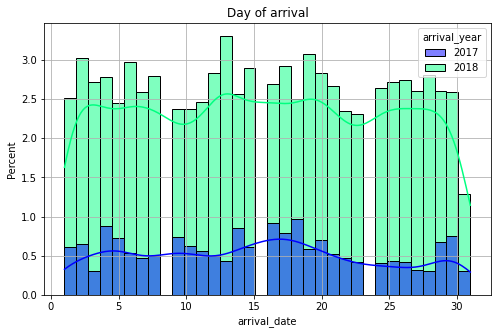

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(
    data=df,
    x=df["arrival_date"],
    hue="arrival_year",
    kde=True,
    stat="percent",
    palette="winter",
)
# plotting a histogram to create a bar graph
plt.title("Day of arrival")  # Add title
plt.grid()  # add grid
plt.show()

There in a clear pattern, the preferred dates for guests are the middle days of the month and the very beginning days of the months, in that order.

In [53]:
# Numerical variables of the dataset
df.select_dtypes(np.number).columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### n.Variable repeated_guest

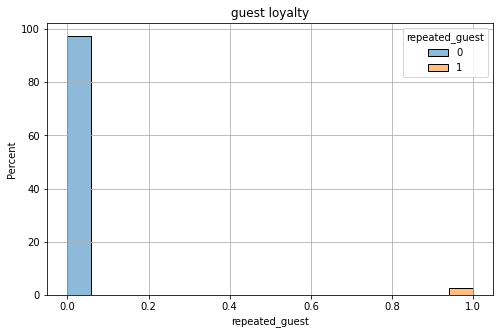

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(
    data=df, x=df["repeated_guest"], stat="percent", hue="repeated_guest", color="pink",
)
# plotting a histogram to create a bar graph
plt.title("guest loyalty")  # Add title
plt.grid()  # add grid
plt.show()

As we could find out previously, most of the clients are first time guest at the hotel. Only 3% of the customers have repeated their experience in INNHotels. We to do further research to find out if clients are not loyal to the hotel or most of the guest are residents in far location and they most of them do not repeat Portugal as a vacation place.
Considering the limited amount of information about the clients profile and we are only provided a limited timeframe, considering that vacation time is an cyclical, we cannot make assumptions.


#### o.Variable no_of_previous_cancellations'

In [55]:
df["no_of_previous_cancellations"].max()

13

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

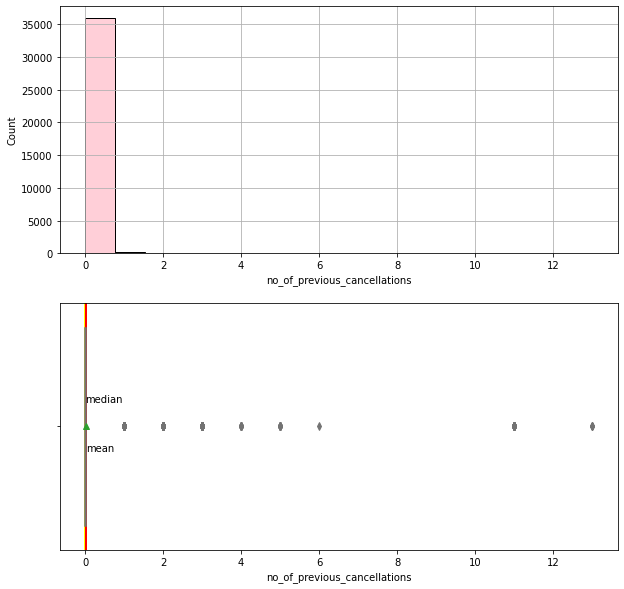

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(
    data=df, x=df["no_of_previous_cancellations"], stat="count", color="pink",
)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df["no_of_previous_cancellations"],
    showmeans=True,
    linewidth=2.5,
    palette="spring",
)
plt.axvline(x=0, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=0.023, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=0.023, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()


The number of previous cancellations in the hotel for the 98% of the clients is cero. That means that only a small number of bookings have been cancelled and there are some upper whiskers outliers, with a maximum of 13 booking cancellation.
 

#### p.Variable no_of_previous_bookings_not_canceled

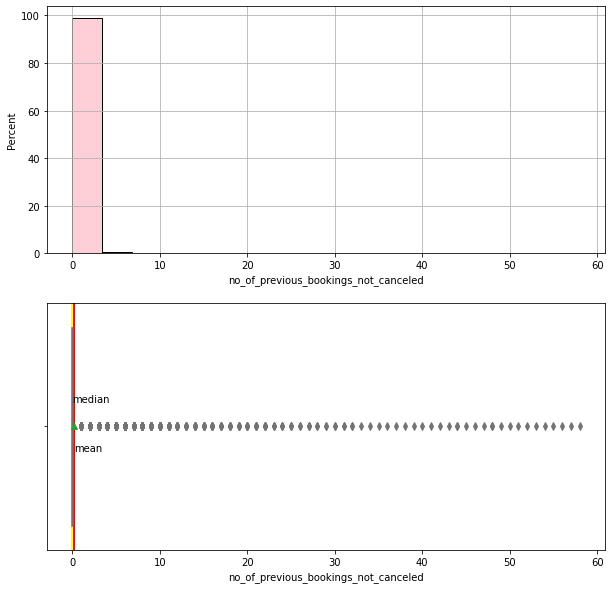

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.histplot(
    data=df, x=df["no_of_previous_bookings_not_canceled"], stat="percent", color="pink",
)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df["no_of_previous_bookings_not_canceled"],
    showmeans=True,
    linewidth=2.5,
    palette="spring",
)
plt.axvline(x=0, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=0.15, linewidth=2, color="red")  # we draw the mean value
plt.text(x=0, y=-0.1, s="median")  # we add text on the plot with names for the lines
plt.text(x=0.15, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

This variable is counting the number that the guests have stayed in the hotel previously. Even though most of the customer do not repeat their experience in INNHotels, there are some guests that have frequently stayed in the same hotel group, they are like their service. The distribution is showing them as outliers, but this is just a different pattern that differ from the average customer behavior. We should study those customers in detail, since they are not outliers, they are the type of customer that the Hotel group needs and should be the INNHOtels market target.  Unfortunately, only the 3% of the clients repeat their booking one or more times with the hotel group.

#### q.Variable avg_price_per_room

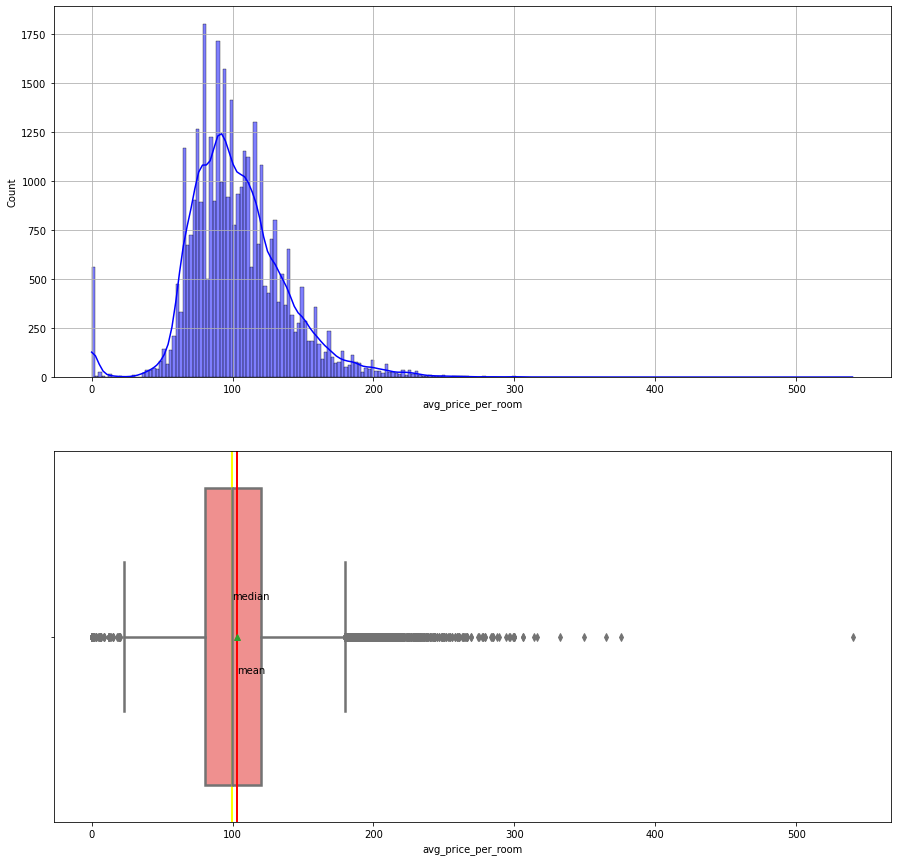

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
sns.histplot(
    data=df, x=df["avg_price_per_room"], kde=True, stat="count", color="blue",
)
plt.grid()
plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x=df["avg_price_per_room"],
    showmeans=True,
    linewidth=2.5,
    palette="spring",
)
plt.axvline(x=99.45, linewidth=2, color="yellow")  # we draw the median value
plt.axvline(x=103.42, linewidth=2, color="red")  # we draw the mean value
plt.text(
    x=99.45, y=-0.1, s="median"
)  # we add text on the plot with names for the lines
plt.text(x=103.42, y=0.1, s="mean")  # we add text on the plot with names for the lines
plt.show()

In [59]:
df[df["avg_price_per_room"] == 0].sample(5)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
25906             1               0                     0                  1   
29188             2               0                     0                  1   
14376             2               0                     0                  0   
24300             2               0                     0                  1   
28587             2               0                     0                  0   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
25906      Not Selected                           0        Room_Type 3   
29188       Meal Plan 1                           0        Room_Type 5   
14376       Meal Plan 1                           0        Room_Type 1   
24300       Meal Plan 1                           0        Room_Type 1   
28587      Not Selected                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
25906          0          2017             12            31   
29188          4          2018             10             1   
14376        256          2017              9            14   
24300          1          2017             11            12   
28587          2          2018              5             1   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
25906       Complementary               0                             0   
29188       Complementary               0                             0   
14376              Online               0                             0   
24300       Complementary               1                             1   
28587              Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
25906                                     0                 0.0   
29188                                     0                 0.0   
14376                                     0                 0.0   
24300                                     6                 0.0   
28587                                     0                 0.0   

       no_of_special_requests  booking_status  
25906                       0               0  
29188                       1               0  
14376                       0               1  
24300                       1               0  
28587                       0               0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
df[df["avg_price_per_room"] >= 350]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
9461              3               0                     0                  2   
20900             2               1                     1                  2   
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
9461        Meal Plan 1                           0        Room_Type 4   
20900       Meal Plan 2                           0        Room_Type 1   
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
9461          21          2018             12            30   
20900        173          2018              7            25   
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
9461               Online               0                             0   
20900             Offline               0                             0   
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
9461                                      0               375.5   
20900                                     0               365.0   
33114                                     0               540.0   

       no_of_special_requests  booking_status  
9461                        0               0  
20900                       1               1  
33114                       0               1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The average price per room is almost normally distributed but there are many outliers on the lower and especially upper whiskers of the distribution. That is due to the volatility of the prices linked to the season. The average price per room is about 100 euros but depending on the month and the season (low or high) the prices will differ. During the low season, hotels tend to offer better prices to maximize the number of customers to attract a different profile of customer, with higher price sensitivity. Higher seasons will give better revenues and profit per client to the group, so they do not need to maximize the occupancy to cover the operational cost, even though maximizing the number of clients along with the revenue would be the the desirable outcome. 
It is obvious that during the low season the hotel will charge much less that the average price. 
When checking the distribution the price 0Euro appear quite often, with a counts of more than 500 times on the dataset. The price 0 Euro seems to be related to a complementary service, or request, such as free snacks, additional bed or crib for babies, or even free shuttle service for guest.We may need to have some more information about what the INNHotel chain is offering as complementary.
We can see that the booking with high prices assigned, end up cancelling.The high rates in March may be related to local special events like the chocolate festival in the medieval town of Obidos,  'Óbidos Chocolate Festival' or the Eater celebration.

#### r.Variable no_of_special_requests

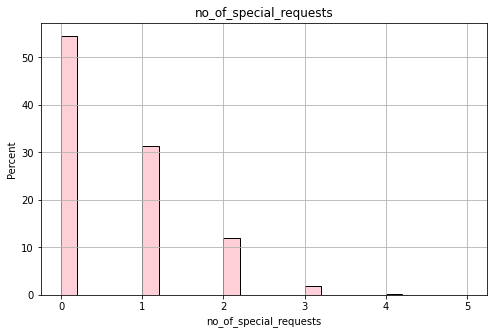

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(
    data=df, x=df["no_of_special_requests"], stat="percent", color="pink", binwidth=0.2
)
# plotting a histogram to create a bar graph
plt.title("no_of_special_requests")  # Add title
plt.grid()  # add grid
plt.show()

In [62]:
df[df["avg_price_per_room"] >= 350]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
9461              3               0                     0                  2   
20900             2               1                     1                  2   
33114             2               0                     0                  1   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
9461        Meal Plan 1                           0        Room_Type 4   
20900       Meal Plan 2                           0        Room_Type 1   
33114       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
9461          21          2018             12            30   
20900        173          2018              7            25   
33114         35          2018              3            25   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
9461               Online               0                             0   
20900             Offline               0                             0   
33114             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
9461                                      0               375.5   
20900                                     0               365.0   
33114                                     0               540.0   

       no_of_special_requests  booking_status  
9461                        0               0  
20900                       1               1  
33114                       0               1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


As we can see, most of the customer do not have any special request. Only 30 per cent of the clients have one request and the number of guests with more than three requests is extremely small .


### 3.2 Bivariate Analysis

Let's create a genearan analysis before we check the variables more in detail. We are creating a pairplot to compare some of the relevant numeric variables and also a Heat map in order to look for corralation.

In [63]:
"""We create a subset with all the numeric variables in order to apply the pairplot 
heatmap functions from seaborn"""

df_heatmap = df.select_dtypes(np.number)


#for the pairplot we will remove some variables in order to be able to visualize the distributions.
df_numb_pair=df[['no_of_weekend_nights',
       'no_of_week_nights', 'lead_time',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'booking_status','no_of_special_requests']]




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###### PAIRPLOT

<Figure size 14400x14400 with 0 Axes>

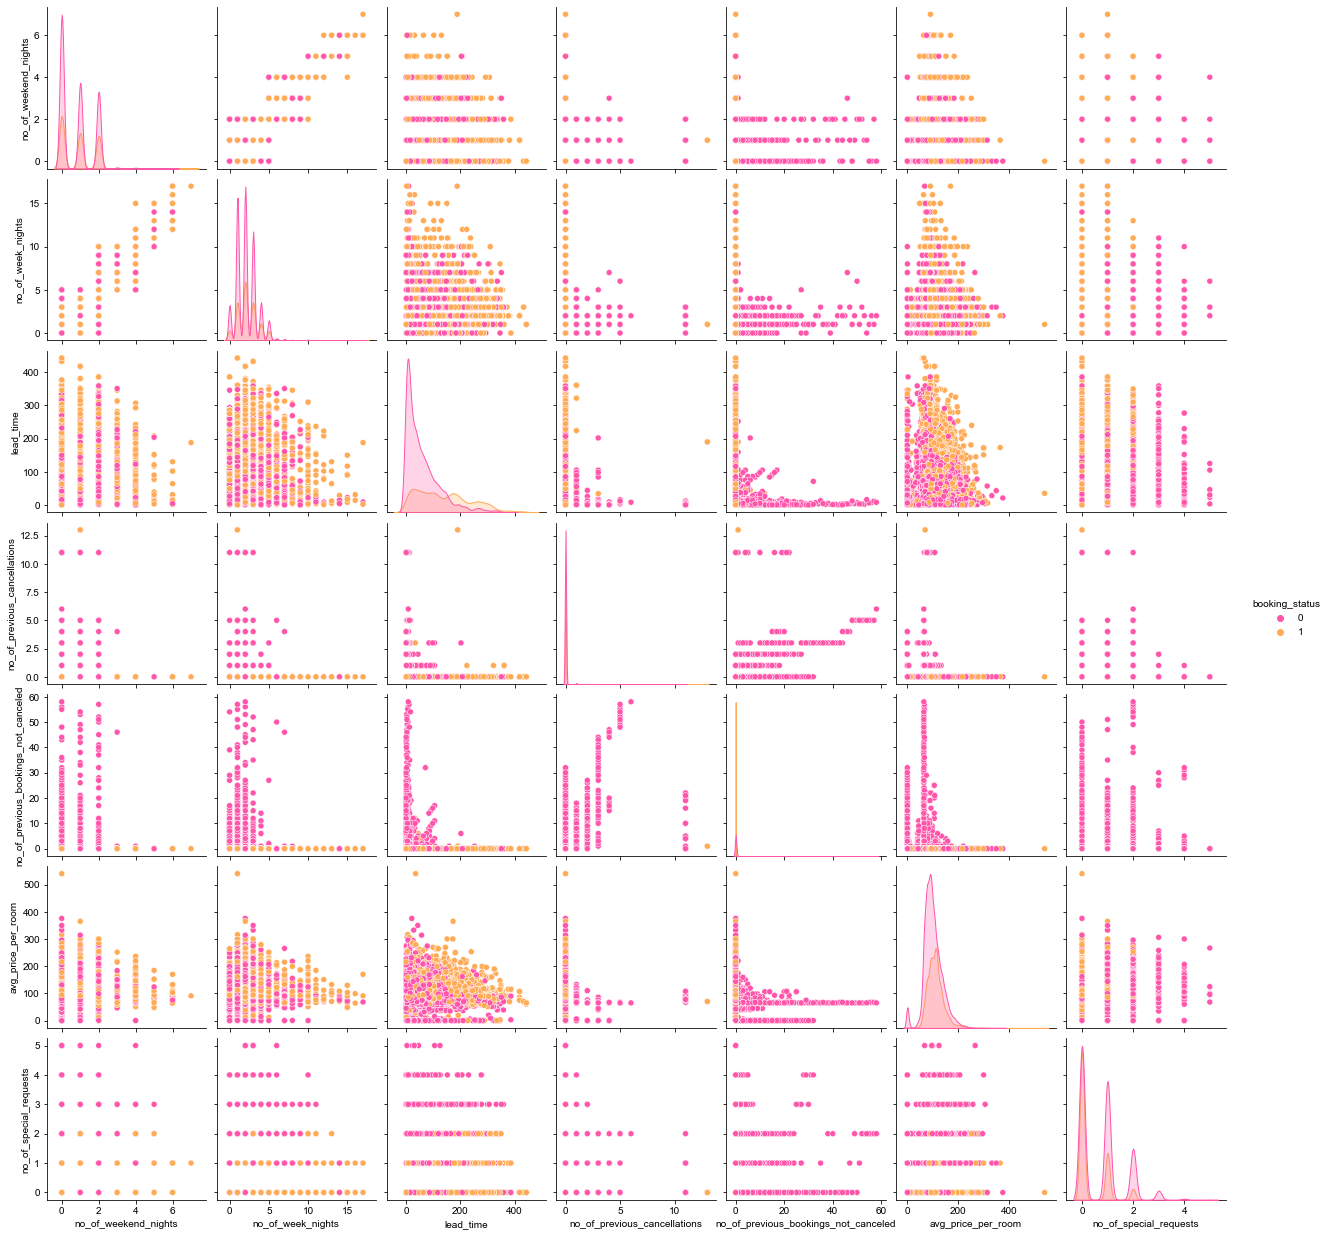

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [64]:

"""Since there are so many variables, we are removing the binary ones from the plot in order to visualize the data"""
plt.figure(figsize=(200, 200))
sns.pairplot(
data=df_numb_pair, diag_kind="kde",height=2.5, palette="spring", hue='booking_status')  # pairplot with histogram in the diagonal.
sns.set(font_scale=0.95)


After a review of the plots, we can see that the bookings with higher lead time did cancel more frequently, what it makes sense. Some of the last-minute reservations typically do not allow you to cancel.
The people with less requests canceled the booking more often. The more requests the customer had, the higher was the price too.
Also, the more lead time from the booking to the planned trip, the higher the price was, and the more people cancelled the reservation
The weeknight has a positive relation with the number of weekends nights.


###### HEATMAP

<AxesSubplot:>

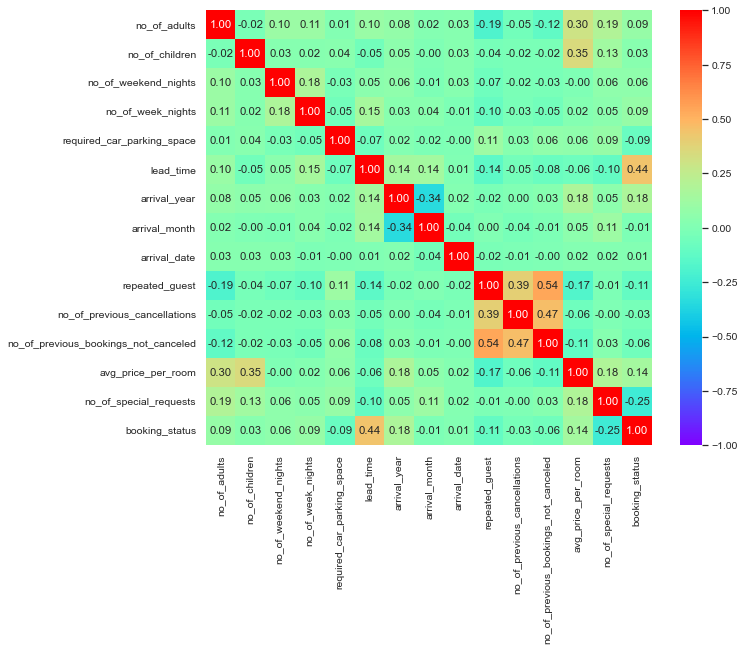

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
"""we will plot a heatmap with a min value of -1 and max value of 1 to simulate the 
coefficient of correlation."""
plt.figure(figsize=(10, 8))  # setting the size of the plot
sns.heatmap(
    df_heatmap.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="rainbow"
)  # creating heatmap with annotations

There is not any strong correlation among any variables. We can see certain relationship between some variables.
- Repeated_guest and number_of_previous_booking_not_canceled. So, the guest that repeat their stay with more frequency, the less are prone to cancel their bookings.
-It seems that the number_of_adults has a slight negative relationship with the repeated_guest variable. That means that the 'only one guests’ is the more loyal client.
- The number of children has a positive relationship with the price_per_room. The more children in the room the more expensive.
-Also the repeated_guest has a positive relationship with the number of previous cancelations.
-Month_arrival and year_arrival relationship is negative due to the fact of having incomplete information for the first six months of 2017.


#### a.Number of request vs booking status


#### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

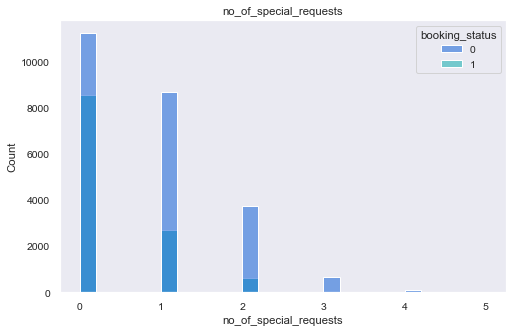

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
plt.figure(figsize=(8, 5))  # plot size
sns.histplot(
    data=df,
    x=df["no_of_special_requests"],
    hue="booking_status",
    stat="count",
    palette="winter",
    binwidth=0.2,
)
# plotting a histogram to create a bar graph
plt.title("no_of_special_requests")  # Add title
plt.grid()  # add grid
plt.show()

In [67]:
df.groupby("booking_status")["no_of_special_requests"].value_counts()

booking_status  no_of_special_requests
0               0                         11232
                1                          8670
                2                          3727
                3                           675
                4                            78
                5                             8
1               0                          8545
                1                          2703
                2                           637
Name: no_of_special_requests, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Customers with higher number of request are more likely to not cancel the booking. Maybe this is why the hotel is offering certain services, called as complementary, for the customers.

#### b.Price vs booking status

<Figure size 864x720 with 0 Axes>

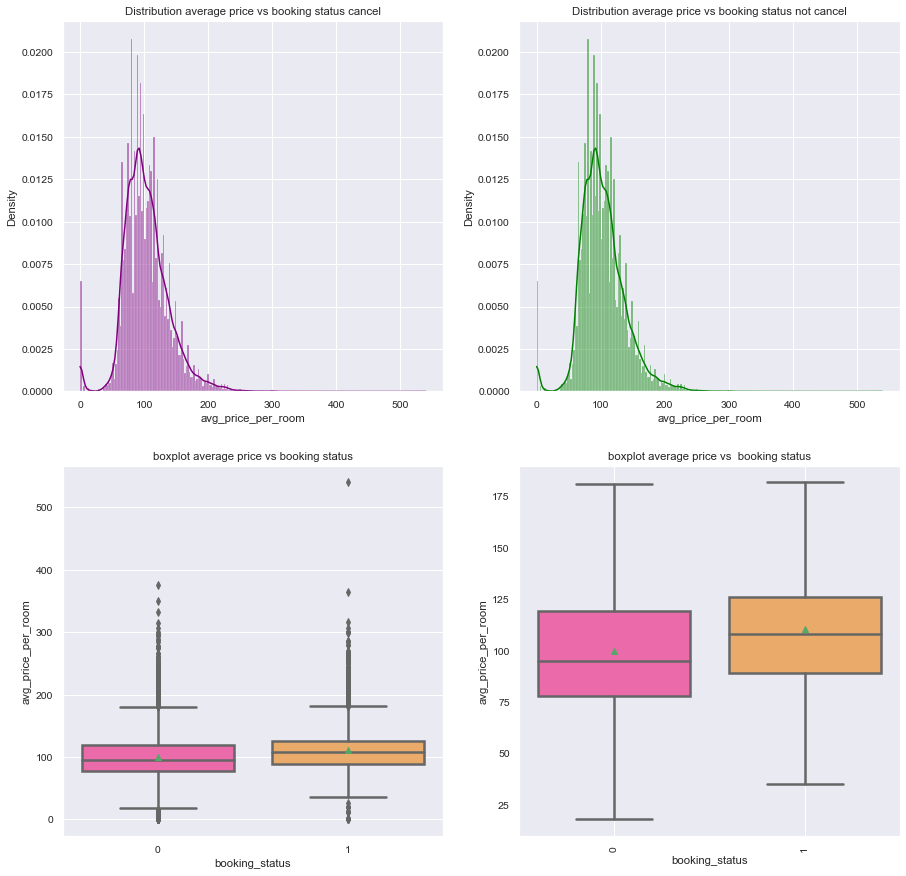

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [68]:
plt.figure(figsize=(12,10))  # size of the plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))#number of columns and rows of subplot

axs[0,0].set_title('Distribution average price vs booking status cancel')
sns.histplot(data=df[df['booking_status']==0],x=df["avg_price_per_room"],kde=True,  ax=axs[0, 0],stat="density",color="purple")
 # histogram with hue per booking status for continues variable
    
axs[0,1].set_title('Distribution average price vs booking status not cancel')
sns.histplot(data=df[df['booking_status']==1],x=df["avg_price_per_room"],kde=True,  ax=axs[0, 1],stat="density",color="green")
 # histogram  for booking status not canceled
    
axs[1,0].set_title('boxplot average price vs booking status')#boxplot with fliers showing mean value
sns.boxplot(data=df, y=df["avg_price_per_room"], x=df["booking_status"], ax=axs[1, 0], showmeans=True, linewidth=2.5,palette="spring")

axs[1,1].set_title('boxplot average price vs  booking status')#boxplot without fliers showing mean value
sns.boxplot(data=df, y=df["avg_price_per_room"],x=df["booking_status"],ax=axs[1, 1], showmeans=True,linewidth=2.5,showfliers=False,palette="spring")

plt.xticks(rotation=90)  # to show the labels in the x axis
plt.grid()
plt.tight_layout
plt.show()


When we do not separate outliers, it seems obvious that the average price of the canceled bookings tends to be more expensive than the one not canceled. There are several outliers for both types of status, but especially for the not cancelled ones. The price distribution behavior is very similar. Some not canceled bookings have higher prices that the not canceled, but initially we could not see that because if we do not plot a few upper outliers of the canceled status, the data shows otherwise

#### c.Price vs number_request

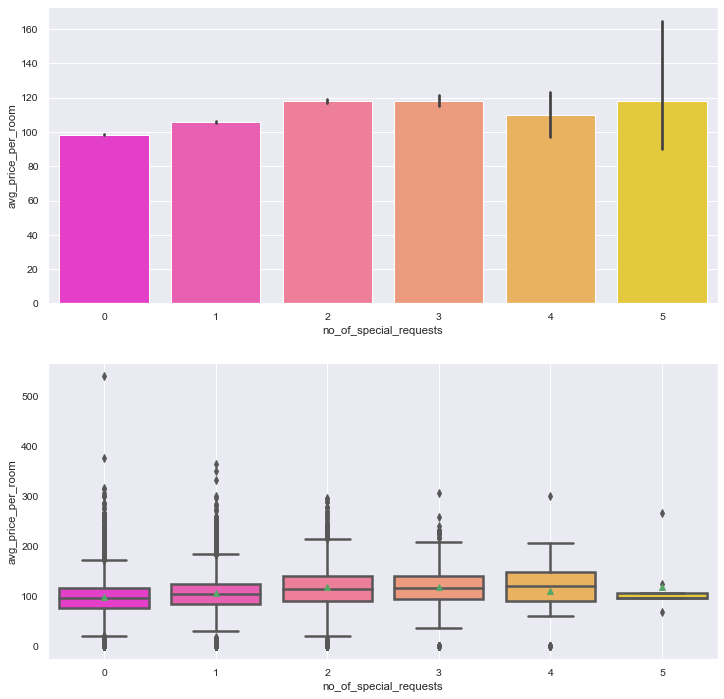

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(12, 12))  # figure size
plt.subplot(2, 1, 1)  # creating subplot
sns.barplot(
    data=df,
    y=df["avg_price_per_room"],
    x=df["no_of_special_requests"],
    palette="spring",
)
plt.subplot(2, 1, 2)  # creating subplot
sns.boxplot(
    data=df,
    y=df["avg_price_per_room"],
    x=df["no_of_special_requests"],
    showmeans=True,
    linewidth=2.5,
    showfliers=True,
    palette="spring",
)  # plotting boxplot with fliers
plt.grid()
plt.show()

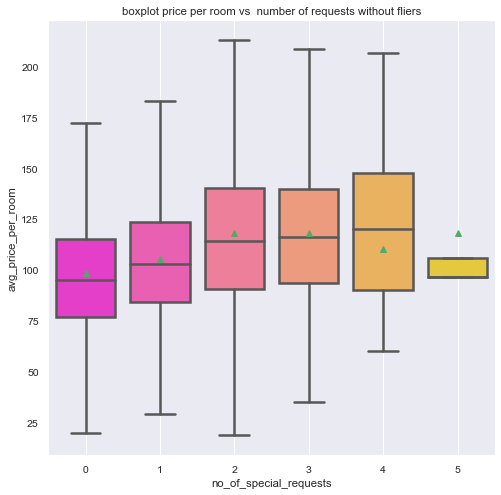

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [70]:
plt.figure(figsize=(8, 8))  # figure size
sns.boxplot(
    data=df,
    y=df["avg_price_per_room"],
    x=df["no_of_special_requests"],
    showmeans=True,
    linewidth=2.5,
    showfliers=False,
    palette="spring",
)  # plotting boxplot including outliers and mean values
plt.title("boxplot price per room vs  number of requests without fliers")
plt.grid()
plt.show()

According to the barplot, the price per room tend to be higher depending on the number of requests up to the third one, but due to so many outliers it is difficult to really tell. We plotted the boxplot whithouth the fliers to see the data. 
it seems that the average price per night is not being affected by the number of requests.

#### d.Price vs segment

#### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

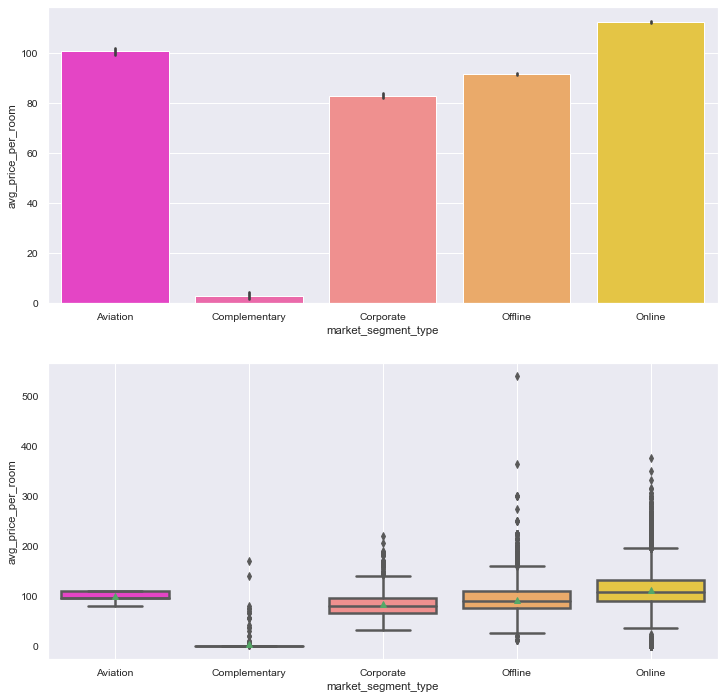

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [71]:
plt.figure(figsize=(12, 12))  # figure size
plt.subplot(2, 1, 1)  # creating subplot
sns.barplot(
    data=df, y=df["avg_price_per_room"], x=df["market_segment_type"], palette="spring"
)
plt.subplot(2, 1, 2)  # creating subplot
sns.boxplot(
    data=df,
    y=df["avg_price_per_room"],
    x=df["market_segment_type"],
    showmeans=True,
    linewidth=2.5,
    showfliers=True,
    palette="spring",
)  # plotting boxplot with fliers
plt.grid()
plt.show()

According to the data, the aviation segment has agreed on a fixed price, that is around 100 euro (average price), so we cannot see any outliers. They do not benefit for the offers or suffer the high season.
The complementary segment may be related to other type of additional services that the hotel may provide, such as a guide or shuttle service, as we can see most of the time the services are free, but there are exceptions. Shuttle usually is at additional cost.
The corporate mean price room is lower than for generic average of 100 euros but there are some upper outliers.
Offline segments mean price is lower than the global average but there are many outliers. There are especially a few customers which price per room is above 300 euros. We can assume that offline bookings are made by customers that prefer to deal directly with the hotel and do not have to pay an agency fee, therefore the mean price when compare with the offline segment is a bit lower. 
The online segment is the one paying the highest rates in average. There are many outliers that increase the mean price that was set up higher for this group. There are many outliers, but the data is not as disperse as in the offline group.This segment would include customers that book thought an online intermediary or agency, so that will inflate the price.


#### e.booking status and lead time 

<Figure size 864x720 with 0 Axes>

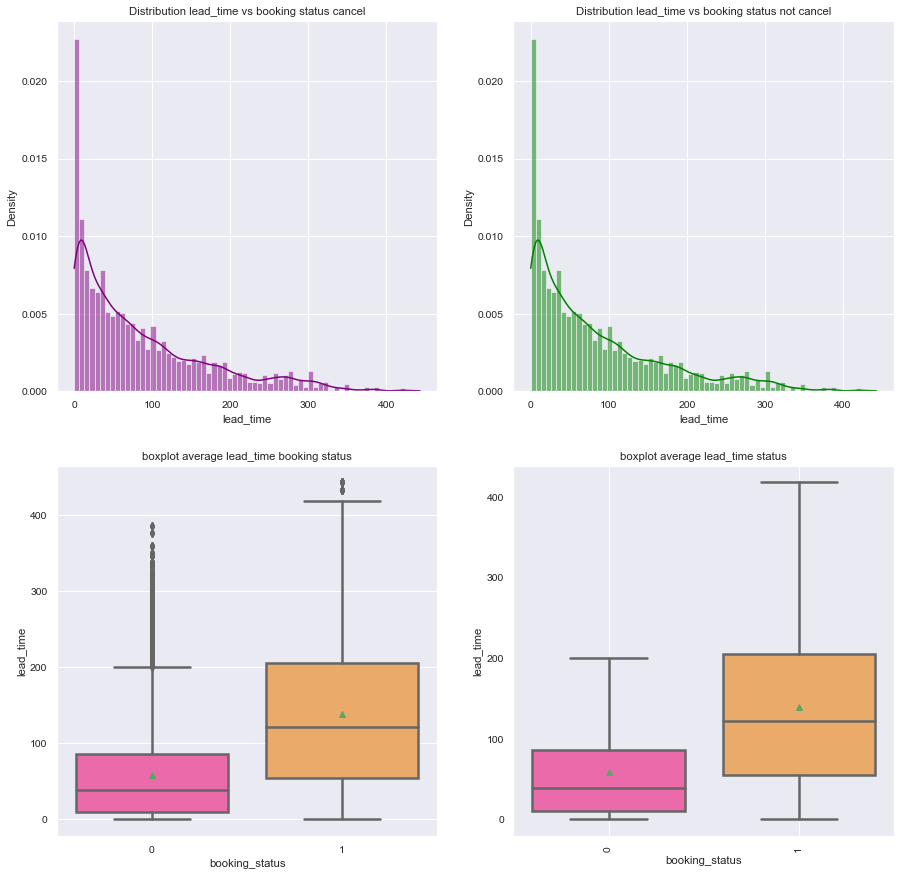

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(12,10))  # size of the plot
fig, axs = plt.subplots(2, 2, figsize=(15,15))#number of columns and rows of subplot

axs[0,0].set_title('Distribution lead_time vs booking status cancel')
sns.histplot(data=df[df['booking_status']==0],x=df['lead_time'],kde=True,  ax=axs[0, 0],stat="density",color="purple")
 # histogram with hue per booking status for continues variable
    
axs[0,1].set_title('Distribution lead_time vs booking status not cancel')
sns.histplot(data=df[df['booking_status']==1],x=df['lead_time'],kde=True,  ax=axs[0, 1],stat="density",color="green")
 # histogram  for booking status not canceled
    
axs[1,0].set_title('boxplot average lead_time booking status')#boxplot with fliers showing mean value
sns.boxplot(data=df, y=df['lead_time'], x=df['booking_status'], ax=axs[1, 0], showmeans=True, linewidth=2.5,palette="spring")

axs[1,1].set_title('boxplot average lead_time status')#boxplot without fliers showing mean value
sns.boxplot(data=df, y=df['lead_time'],x=df['booking_status'],ax=axs[1, 1], showmeans=True,linewidth=2.5,showfliers=False,palette="spring")

plt.xticks(rotation=90)  # to show the labels in the x axis
plt.grid()
plt.tight_layout
plt.show()


As we previously saw, the number of guests that cancel more often are the ones that booked with greater lead times. Usually they have flexibility to cancel before a certain date so if they find better prices, they may prefer to go to a different hotel

#### f. Repeat_guest Vs booking_cancel

In [73]:
# Create dataframe to plot the repeated customers
df_rep = df[df["repeated_guest"] == 1]
df_rep["booking_status"].value_counts(normalize=True)

0    0.982796
1    0.017204
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

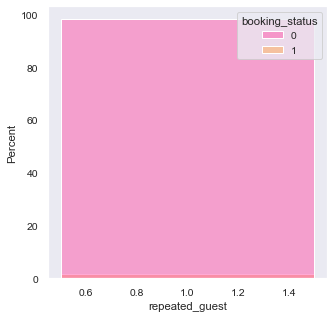

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(5, 5))
sns.histplot(
    data=df_rep,
    x=df_rep["repeated_guest"],
    hue=df_rep["booking_status"],
    stat="percent",
    palette="spring",
)  # using histplot to show percentage on the data,
plt.grid()
plt.show()

We can see that the rate of cancel bookings from repeated customer is very low. Only 2% of the total repeated guest cancel. This is good for the hotel that need to create loyalty among the customers.

#### g. Booking per month




In [75]:
df_booking_not_cancel = df[
    df["booking_status"] == 0
]  # not canceled is 0 and canceled is 1.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
df_booking_not_cancel["guest"] = (
    df_booking_not_cancel["no_of_adults"] + df_booking_not_cancel["no_of_children"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
df_booking_not_cancel.groupby("arrival_month")["guest"].sum()

arrival_month
1     1664
2     2331
3     3199
4     3494
5     3122
6     3434
7     3462
8     4964
9     5710
10    6207
11    3723
12    5249
Name: guest, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_month', ylabel='guest'>

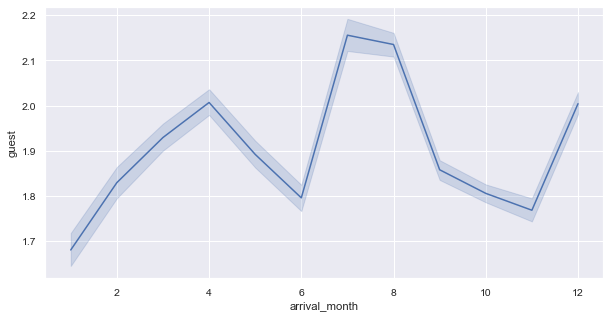

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [78]:
plt.figure(figsize=(10, 5))  # graph size
sns.lineplot(
    data=df_booking_not_cancel,
    x=df_booking_not_cancel["arrival_month"],
    y=df_booking_not_cancel["guest"],
    palette="spring",
)  # plotting a line to have a view of the evoluation of the variable along time

<AxesSubplot:xlabel='arrival_month', ylabel='guest'>

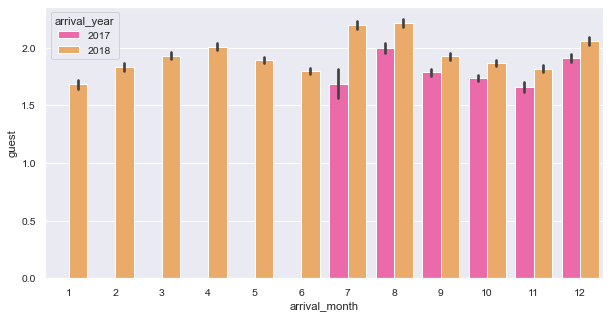

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [79]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df_booking_not_cancel,
    x=df_booking_not_cancel["arrival_month"],
    y=df_booking_not_cancel["guest"],
    hue=df_booking_not_cancel["arrival_year"],
    palette="spring",
)  # we can plot both years occupancy behaviour by using hue

We can see that the busiest months are different for 2018 and 2019. The information is bias because we do not have the first semester info for 2017.
July and August are the busiest months as expected followed by April and December.

#### h. Bookings canceled per month

In [80]:
df_booking_cancel = df[
    df["booking_status"] == 1
]  # not canceled is 0 and canceled is 1. we are creating a data set to plot the cancelations

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
df_booking_cancel["arrival_month"].value_counts()

10    1880
9     1538
8     1488
7     1314
6     1291
4      995
5      948
11     875
3      700
2      430
12     402
1       24
Name: arrival_month, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='arrival_month', ylabel='Percent'>

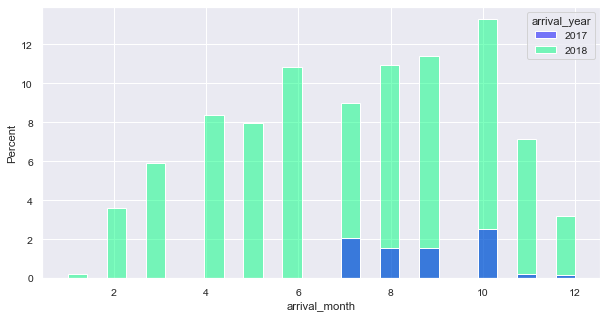

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [82]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df,
    x=df_booking_cancel["arrival_month"],
    hue=df["arrival_year"],
    palette="winter",
    stat="percent",
)  # histplot will give us the percentage directly by using stat. We ara plotting the cancelation per month and year

October and September are the months with the greater number of cancelations for 2018 and for 2017 we can see that most of the cancelation affected also October and June.

#### i.Price per month

<AxesSubplot:xlabel='arrival_month', ylabel='avg_price_per_room'>

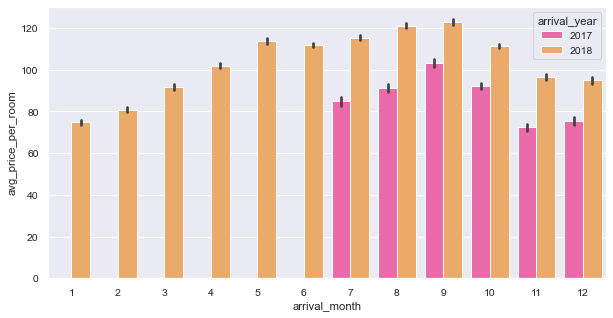

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [83]:
plt.figure(figsize=(10, 5))
sns.barplot(
    data=df,
    x=df["arrival_month"],
    y=df["avg_price_per_room"],
    hue=df["arrival_year"],
    palette="spring",
)

The plot shows how the prices of the hotel rooms increased dramatically from 2017 to 2018. September and August are the months with the highest prices per room in average. In January and February 2017, we can find the most affordable rooms (it is low season).)

#### j. Families in the hotel 

In [84]:
df_fami = df[(df["no_of_adults"] > 0) & (df["no_of_children"] > 0)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [85]:
guest_1ad = df[df["no_of_adults"] > 0]
df_fam = guest_1ad[guest_1ad["no_of_children"] > 0]
df_fam["booking_status"].value_counts(normalize=True)

0    0.625244
1    0.374756
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:
booking_fam = df_fam["booking_status"].count()
booking_total = df["booking_status"].count()
perc_fam_hotel = booking_fam / booking_total * 100
perc_fam_hotel

7.054445210199862

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='no_of_children', ylabel='Percent'>

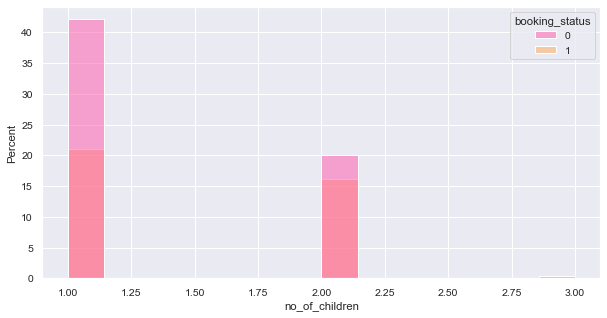

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(
    data=df_fam,
    x=df_fam["no_of_children"],
    hue=df_fam["booking_status"],
    palette="spring",
    stat="percent",
)  # plotting booking status per families in relationg to the number of children by using histplot to see the percentage

Families are not the main business target of INNHotel chain. They represent only 7% of the bookings and as we can see 37 percent of the families end up cancelling. The smallest families (with only 1 child), tend to cancel less often.

#### k. Number of nights

In [88]:
# create subdataframe to plot the number of night in general that customer stay.
df_night = df[(df["no_of_weekend_nights"] > 0) | (df["no_of_week_nights"] > 0)]
df_night["n_any_night"] = (
    df_night["no_of_weekend_nights"] + df_night["no_of_week_nights"]
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [89]:
# number of nights per booking in percentage (most frequent)
perc_night = df_night["n_any_night"].value_counts(normalize=True) * 100
perc_night.head(6)

3    27.770257
2    23.405255
1    18.244606
4    16.280355
5     7.152526
6     2.848302
Name: n_any_night, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [90]:
# number of nights per booking in percentage (less frequent)
perc_night.tail()

21    0.011051
18    0.008288
23    0.005525
22    0.005525
24    0.002763
Name: n_any_night, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='n_any_night', ylabel='Percent'>

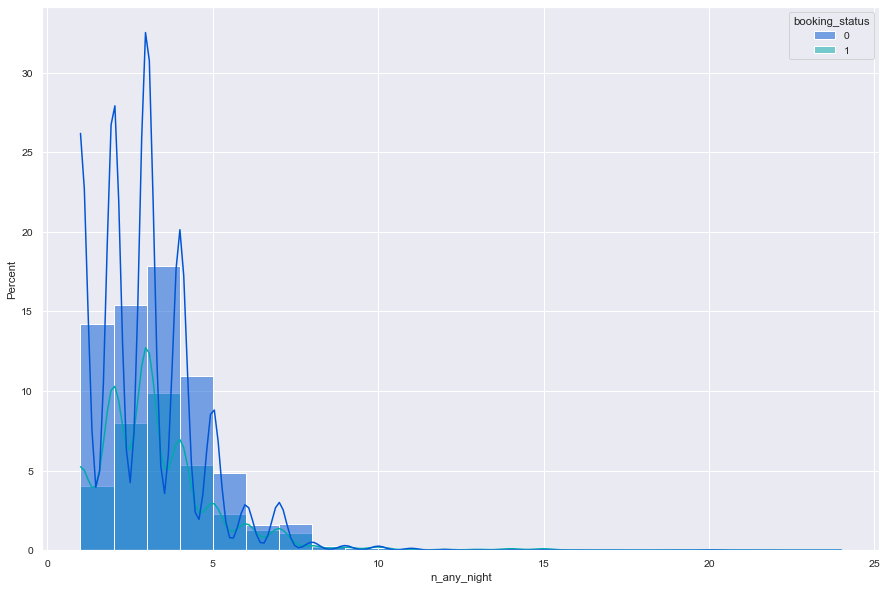

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [91]:
plt.figure(figsize=(15, 10))
sns.histplot(
    data=df_night,
    x=df_night["n_any_night"],
    hue=df_night["booking_status"],
    palette="winter",
    stat="percent",
    binwidth=1,
    kde="true",
)

Most of the guests will stay three nights, followed by two and one respectively. There are a few guest with that spend long period in the hotel but this is an exception. The longer the guest is planning to stay, the more likely is to 
The percentage of booking cancelled is higher for one night. Also, we can appreciate that the longer the customers plan to stay, the cancelations are less frequent.


#### L.Segment market vs type of room

<AxesSubplot:xlabel='room_type_reserved', ylabel='Count'>

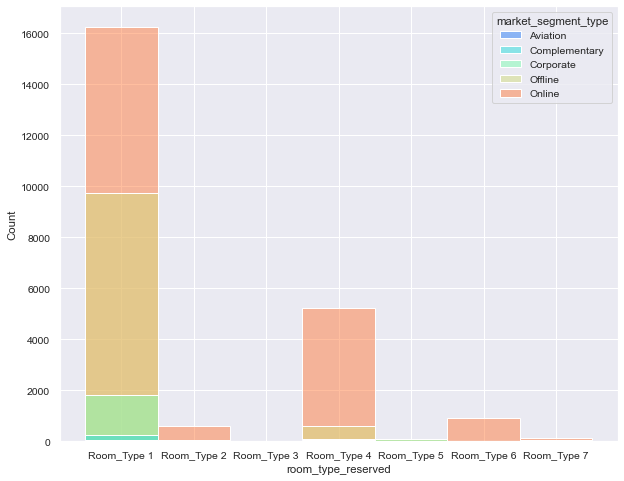

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x=df["room_type_reserved"],
    hue=df["market_segment_type"],
    palette="rainbow",
    stat="count",
)

The type of room preferred is type1 for all segment market. online sector is the one that used more types of rooms.

#### m.Segment market vs number of request

<AxesSubplot:xlabel='no_of_special_requests', ylabel='Percent'>

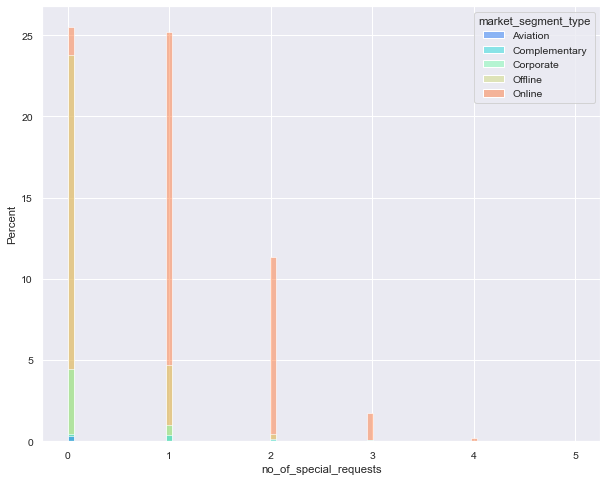

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
plt.figure(figsize=(10, 8))
sns.histplot(
    data=df,
    x=df["no_of_special_requests"],
    hue=df["market_segment_type"],
    palette="rainbow",
    stat="percent",
)

online sector is the one whith more number of requests.

## 4.Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

#### 1.Checking and treating outliers

In [94]:
# creating a list with all the numeric variables to plot outliers
list_outlier = df.select_dtypes(np.number).columns.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

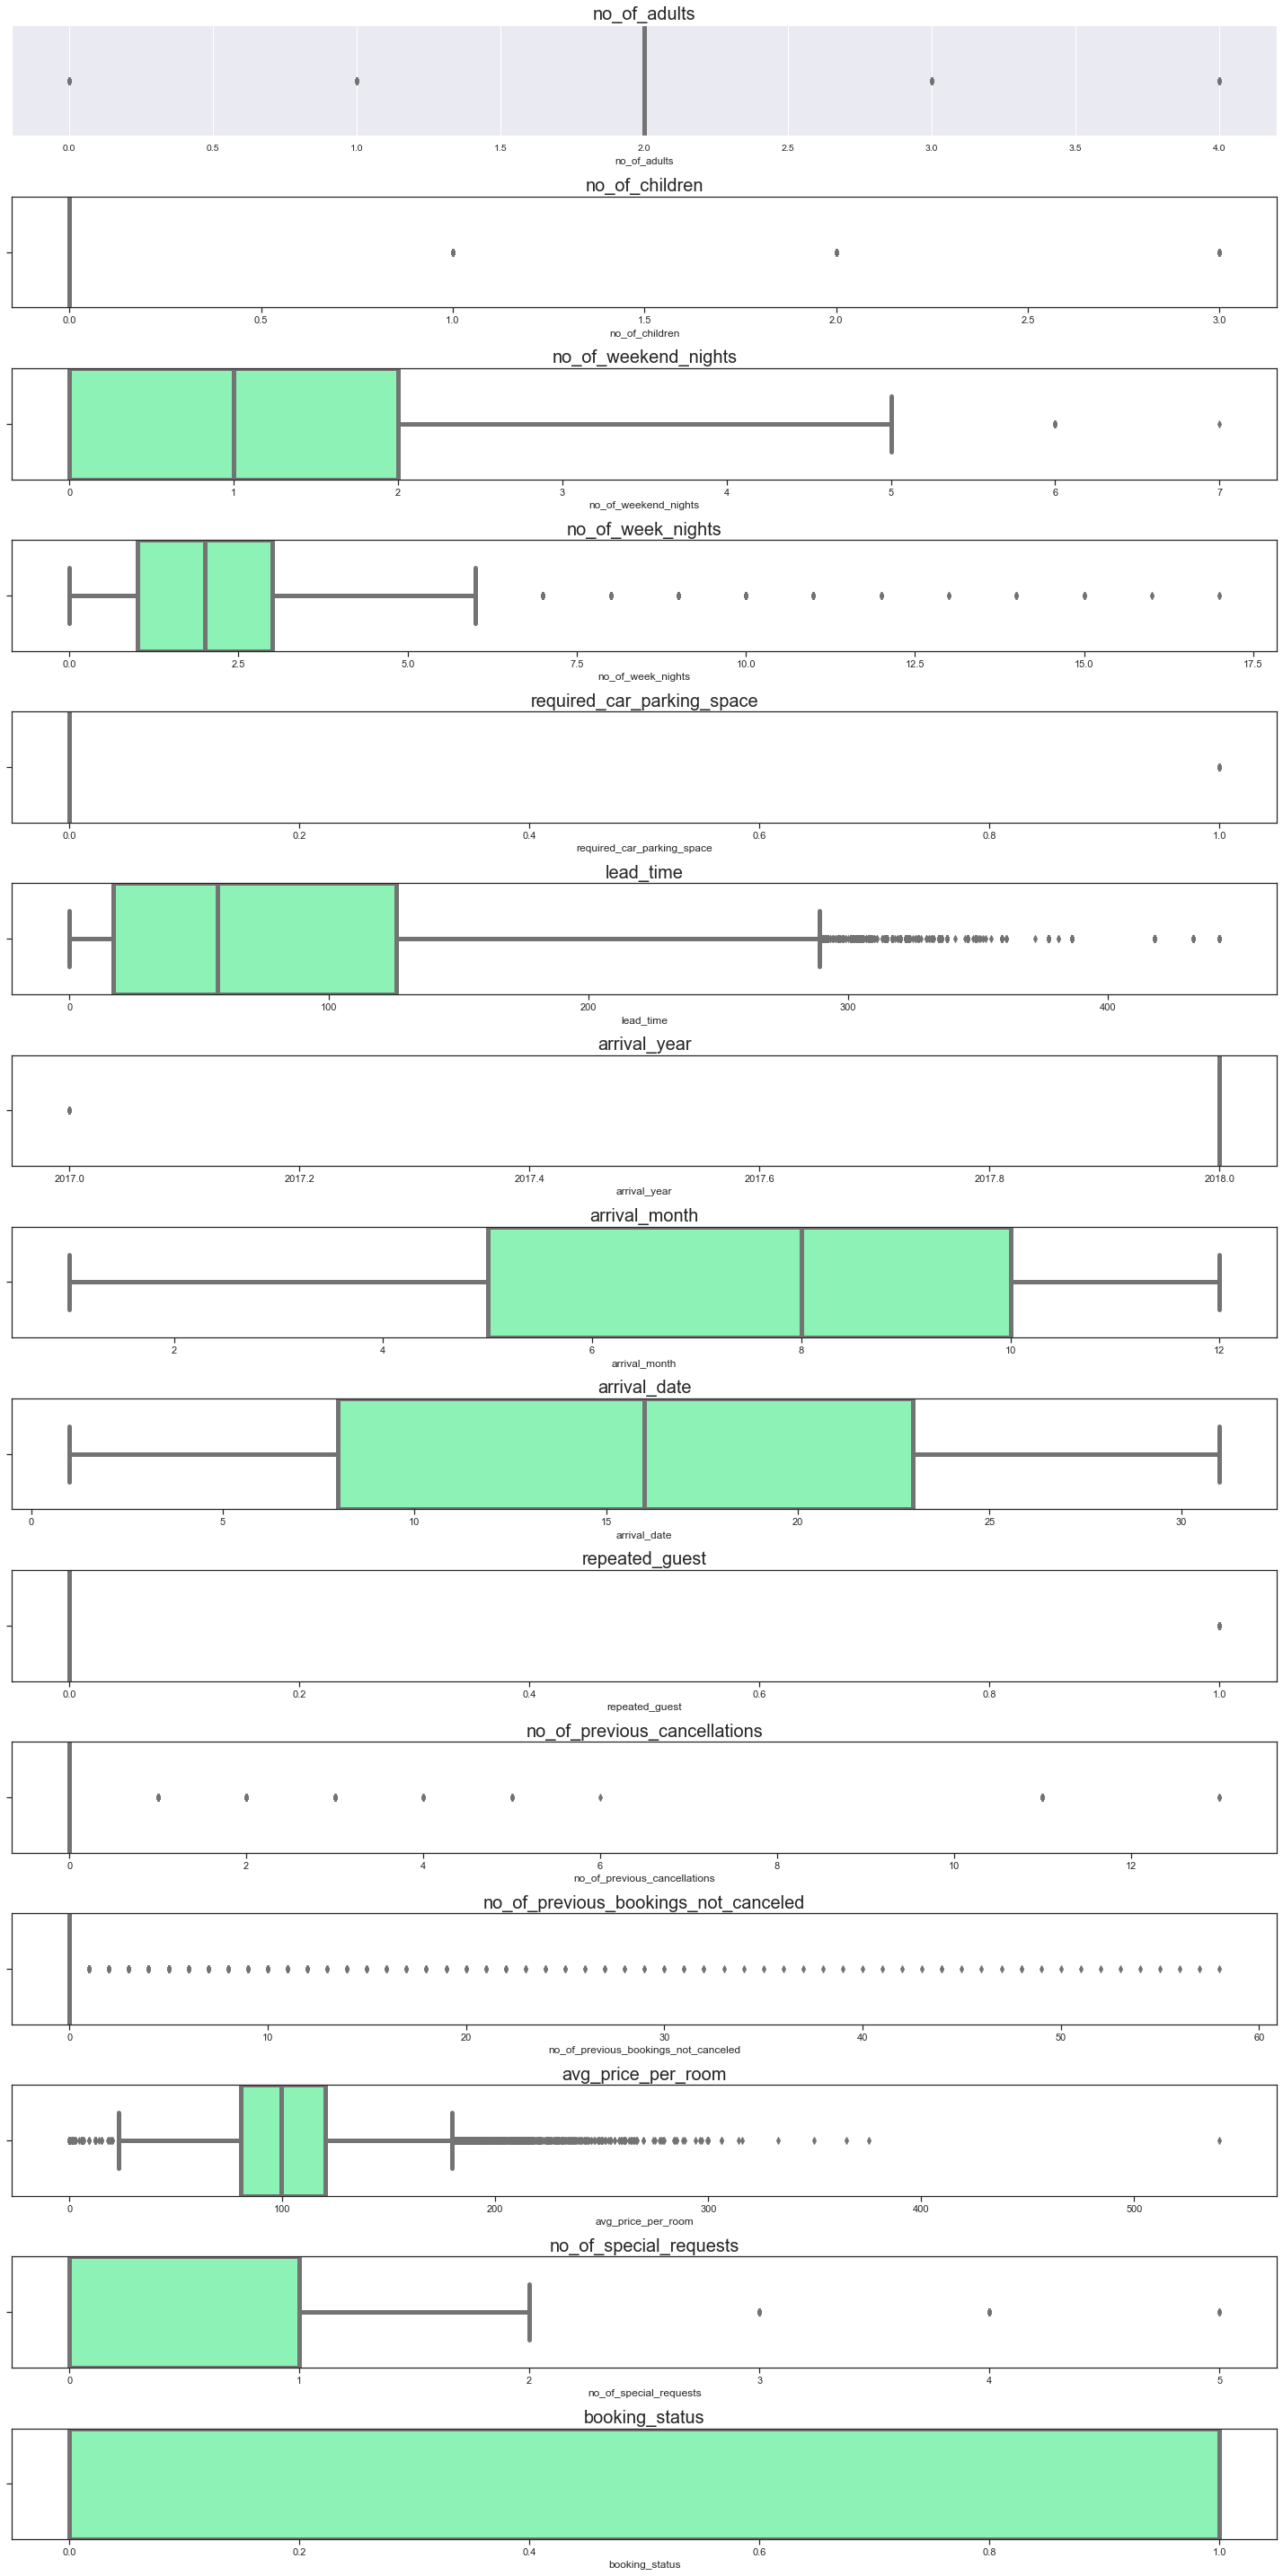

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
# we specify the variables which outliers we want to check by creating a list and then by using a for loop we can use the boxplot.

plt.figure(figsize=(20, 40))

for i in range(len(list_outlier)):
    plt.subplot(15, 1, i + 1)
    sns.boxplot(
        x=df[list_outlier[i]],
        whis=1.5,
        palette="rainbow",
        linewidth=5,
        saturation=0.8,
        width=1,
    )
    plt.title(list_outlier[i], fontsize=20)
    sns.set_theme(style="ticks")
    plt.tight_layout()
    plt.show

After plotting all variables outliers, variable avg_price_per_room could be treated for outliers since some of the values are very extreme, affecting the mean value dramatically. To avoid collinearity issues, we are not going to treat outliers. Unfortunately, this process is producing multicollinearity issues so we are going to avoid the treating outliers.

In [96]:
df1 = df.copy()  # making a copy before feature ingeneering

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [97]:
# Cheking variable type info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          36275 non-null  int64   
 1   no_of_children                        36275 non-null  int64   
 2   no_of_weekend_nights                  36275 non-null  int64   
 3   no_of_week_nights                     36275 non-null  int64   
 4   type_of_meal_plan                     36275 non-null  category
 5   required_car_parking_space            36275 non-null  int64   
 6   room_type_reserved                    36275 non-null  category
 7   lead_time                             36275 non-null  int64   
 8   arrival_year                          36275 non-null  int64   
 9   arrival_month                         36275 non-null  int64   
 10  arrival_date                          36275 non-null  int64   
 11  ma

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [98]:
# creating a list to treat price per room outliers, the only continous variable in the model.
var_outliers_treat = ["avg_price_per_room"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The process that we previously followed to treat outlier was limited to the upper extreme values(more that 350 euros per night).It caused collinearity issues and we could not fit the logistic model so we reverted the changes. Below you can see the process followed for capping the upper whiskers.

In our case we only wanted to limit the upper ouliers but the value that we re going to use for the price variable are going to be different because we do not want to affect the nature of the distribution. We are applying the limit to the very top values of the price.

Upper outlier is Q3+6*IQR, calculation for the maximun values accepted

Q1=df[col].quantile(0.25), 25th quantile

Q3=df[col].quantile(0.75), 75th quantile

IQR=Q3-Q1# interquartile range

lw=0, lower whisker, we do not change the lower whisker

uw=Q3+6*IQR, upper whisker, we are trimming only hight values of the upper whisker

df[col]=np.clip(df[col],lw,uw)# using cap function to limit the outliers



#### 2. Feature engineering 

In [99]:
"""The code below was used to cap the  price per room variable, We can capped the upper whiskers by using a for loop that find whiskers and apply the clip function to limit the outliers."""

for col in var_outliers_treat:

    Q1 = df[col].quantile(0.25)  # we

    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1

    lw = df[col].min()  # lower whisker is o, the lower values do not change

    uw = Q3 + 6 * IQR  # upper whisker that cap the price up to 350 per night

    print(col, lw, uw)

    df[col] = np.clip(df[col], lw, uw)

    print("min", lw, "max", uw)

    print("_______")

# As we indicated previously we reverted the outlier treatment because it was not letting us fit the model.

avg_price_per_room 0.0 358.20000000000005
min 0.0 max 358.20000000000005
_______


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##  3.EDA after variable transformation

- It is a good idea to explore the data once again after manipulating it.

#### Plotting Price Per room after outliers treatment

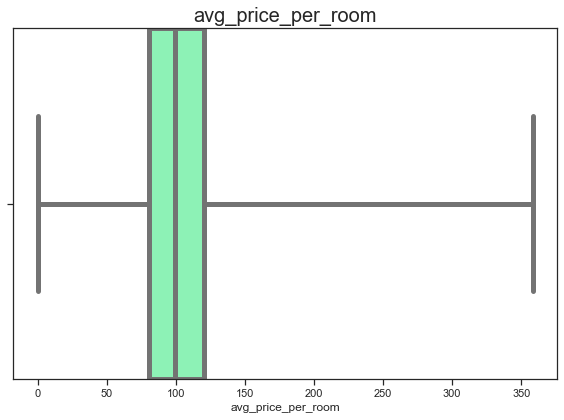

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [100]:
'''After removing outliers we could plot the average price distribution we plotted the '''

plt.figure(figsize =(8,6))

for i in range(len(var_outliers_treat)):

    plt.subplot(1, 1, i+1)

    ax=sns.boxplot(x=df[var_outliers_treat[i]],  palette='rainbow', linewidth=5,saturation=0.8,whis=6, width=1)

    plt.title(var_outliers_treat[i], fontsize=20)
   
    sns.set_theme(style="ticks")

    plt.tight_layout()

    plt.show()


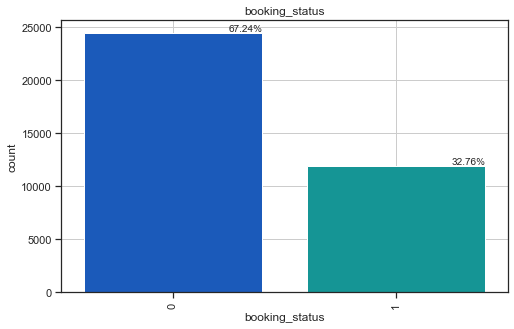

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
### Booking_status variable.We changed to 0 and 1 values

plt.figure(figsize=(8, 5))  # size of each plot
total = float(len(df))  # to calculate percentage
ax = sns.countplot(
    data=df, x="booking_status", palette="winter"
)  # we are using countplot for categorical values
plt.grid()  # grid will help visualization
plt.title("booking_status")
plt.xticks(rotation=90)
for p in ax.patches:  # add percentage
    percentage = "{:.2f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(
        percentage, (x, y), ha="right", va="bottom", fontsize=10
    )  # show the percentage in the plot
plt.show()

WE can see  booking status with the new assigned values:
   - Cancel=0
   - Not_cancelled=1

#### Number of children

Number of children. Fixing upper outliers(creating 3 categories:1 child,2 children and 3 for any group of more than 2(3 children or above 3)

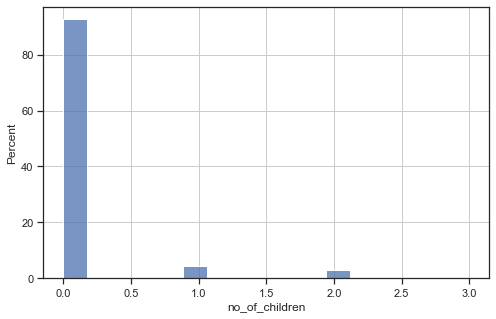

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
plt.figure(figsize=(8, 5))

sns.histplot(data=df, x=df["no_of_children"], stat="percent", palette="winter")
plt.grid()
plt.show()

**PREPARING DATA FOR MODELING**

In [103]:
### The process that we previously followed to treat outlier was limited to the upper extreme values(more that 350 euros per night) as shown on the plot. But unfortunatelly it  has cause some issues in the model. we are reverting the changes by using the copy of df, tha is df1.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:
# dividing dataset in target variable and predictors
x = df1.drop(["booking_status"], axis=1)
y = df1["booking_status"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [105]:
# getting dummy variables
x = pd.get_dummies(x, drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [106]:
# adding constant to the model
x = sm.add_constant(x)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [107]:
# Splitting data in train and test in a 70:30 proportion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [108]:
# number of train data
n_train = x_train.shape[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [109]:
# number of test data
n_test = x_test.shape[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [110]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25392 entries, 13662 to 33003
Data columns (total 28 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 25392 non-null  float64
 1   no_of_adults                          25392 non-null  int64  
 2   no_of_children                        25392 non-null  int64  
 3   no_of_weekend_nights                  25392 non-null  int64  
 4   no_of_week_nights                     25392 non-null  int64  
 5   required_car_parking_space            25392 non-null  int64  
 6   lead_time                             25392 non-null  int64  
 7   arrival_year                          25392 non-null  int64  
 8   arrival_month                         25392 non-null  int64  
 9   arrival_date                          25392 non-null  int64  
 10  repeated_guest                        25392 non-null  int64  
 11  no_of_previ

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [111]:
print(f"The number of train data is {n_train} and test data is {n_test}")

The number of train data is 25392 and test data is 10883


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [112]:
prop_y_test = y_test.value_counts(normalize=True) * 100
prop_y_test

0    67.6376
1    32.3624
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [113]:
prop_y_train = y_train.value_counts(normalize=True) * 100
prop_y_train

0    67.06443
1    32.93557
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [114]:
print(
    f"For y_test The proportion of cancelations is  {np.round(prop_y_train[0],2)}%  and not_canceled is  {np.round(prop_y_train[1],2)}%"
)

For y_test The proportion of cancelations is  67.06%  and not_canceled is  32.94%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A.Building a Logistic Regression model



As we initially explain, we are trying to predict what booking will be cancelled.In orde to do so, we are creating a logistice model.
Booking_status is divided in two classes, class 0 and class 1 (Canceled bookings is 1 and Not_Canceled is 0).
Class o corresponds to the clients that did not cancel the booking.
class 1 corresponds to the clients that canceled the booking.


**Model evaluation criterion**
Model can make wrong predictions as:
Predicting a booking will cancel (0) but in reality, the guest does not cancel the booking.
Predicting a booking will not cancel (1) but in reality, the customer end up cancelling the booking. 

**Which case is more important? **
Both the cases are important as:

If we predict a booking will cancel (0) and the guest arrive to the hotel and do not have a good service because of the lack of resources (not enough towels or rooms available), it could affect the rating of the hotel chain and eventually the income and revenue.
If we predict a guest will not cancel and end up cancelling the booking, the hotel will have the opportunity cost of an empty room along with additional cost of the room preparation and in high season maybe additional employees to help improve the customer’s experience.

How to reduce this loss we need to reduce False Negatives?
f1_score should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly. 
F1_score shows a proportional importance of both recall and precision. Important in our case.
Recall is telling us from the actual data, how many true bookings we could identify.
Precision is telling us from the bookings that we considered true, how many are actually true.


In [115]:
# Create a function to calculate recall, accuracy,f1_score and precision for the model.


def model_performance_linear_regression(model, predictors, target, threshold=0.5):
    """
    Function to return a dataframe with the performance measures or method
    model: model that classify the bookings in true or false
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classification the next class (in this case 1)
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding the predicted values to a class
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # for Accuracy
    recall = recall_score(target, pred)  # for  Recall
    precision = precision_score(target, pred)  # forPrecision
    f1 = f1_score(target, pred)  # for  F1-score

    # creating a dataframe to compute all the data
    df_perform = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perform

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Fitting the model

Before we fit the model, we need to get a performance measure that take into account f1, recall, precision and accuracy to be able to check the model performance.
Also, we need to use a confusion matrix to plot how the data is capture in the model, how many true and wrong prediction we got with our model.


In [116]:
# Initial model, Model_0
# fitting logistic regression model
from sklearn.linear_model import LogisticRegression

logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3293
Time:                        20:22:59   Log-Likelihood:                -10793.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -923.2807    120.833     -7.641      0.000   -1160.110    -686.452
no_of_adults                             0.1136      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [117]:
# Model_0
lg.params

const                                  -923.280748
no_of_adults                              0.113633
no_of_children                            0.158327
no_of_weekend_nights                      0.106783
no_of_week_nights                         0.039778
required_car_parking_space               -1.593957
lead_time                                 0.015703
arrival_year                              0.456317
arrival_month                            -0.041561
arrival_date                              0.000480
repeated_guest                           -2.347621
no_of_previous_cancellations              0.266416
no_of_previous_bookings_not_canceled     -0.172732
avg_price_per_room                        0.018771
no_of_special_requests                   -1.468861
type_of_meal_plan_Meal Plan 2             0.176783
type_of_meal_plan_Meal Plan 3            17.708567
type_of_meal_plan_Not Selected            0.278272
room_type_reserved_Room_Type 2           -0.360885
room_type_reserved_Room_Type 3 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Observations on Model_0:
We have  25392 observations in our trainset.

-The constant of the initial model is -923.280748.

-We also have 27 variable coefficients :

    -Positive values of the coefficient will show the probability of a customer cancelling the booking, we need to remove multicollinearity from data first to get reliable coefficients and p_values.
    -Negative variables of the coefficient will show the probability of a customer cancelling the booking.
    
This is not the final model since we have to make sure there is not multicollinearity that can affect the reliability of  the coefficient numbers and therefore, will affect the model interpretation. In order to do that we are using the variance_inflation_factor. 
We need to complete the multicolinearity removal process first because it can affect the p_values. 

    


<function matplotlib.pyplot.show(close=None, block=None)>

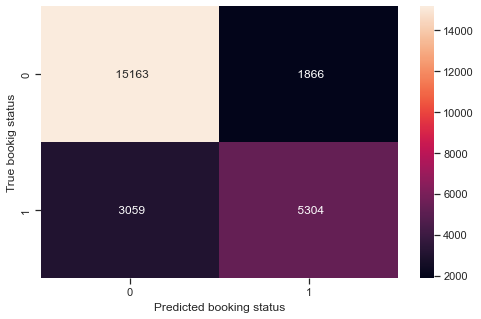

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [118]:
#creating a confusion matrix to plot the clasification on train set. the defauls thredshold is 0.5
pred_train= lg.predict(x_train)>0.5
pred_train=np.round(pred_train)
cm=confusion_matrix(y_train,pred_train)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,fmt=' ')
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status")
plt.show


In [119]:
# Errors on train data (prediction errors)
error_train_percentage = (3059 + 1866) / x_train.shape[0] * 100
print(np.round(error_train_percentage, 2))

19.4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


From the matrix we can se that 1866 that we predicted as canceled bookings did not cancel, and 3059 that we predicted as not canceled ,actually canceled. The total error, false positives and false negatives is 19.4% of the train data is misclassified.


In [120]:
#Let's check the performance of our model on train set
model_performance_linear_regression(lg, x_train, y_train, threshold=0.5)



Accuracy    Recall  Precision        F1
0  0.806041  0.634222   0.739749  0.682933

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [121]:
#Let's check the performance of our model on test set
model_performance_linear_regression(lg, x_test, y_test, threshold=0.5)



Accuracy    Recall  Precision        F1
0  0.804925  0.632595   0.728819  0.677307

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accuracy is a relatively fine value but we f1 that was our target is just decent. Let's see if we can improve our model. The resuls on test and train data are very similar, so this means the model is not overfitted.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data. By using VIF factors measure, we can make sure that the regressiong coefficients are not inflated. VIF should not be above 5.
If VIF exceeds 5, we need to remove the variable because it can inflate the coefficient of the predictor variables.

In [122]:
# creating a series that will apply the VIF factor to each variable of the training data and will return the VIF and column name.
VIF_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
# Checking VIF in descending order
VIF_series.sort_values(ascending=False).apply(
    lambda x: "%.3f" % x
)  # suppress scientific notation

const                                   39474810.786
market_segment_type_Online                    71.180
market_segment_type_Offline                   64.115
market_segment_type_Corporate                 16.928
market_segment_type_Complementary              4.501
no_of_children                                 2.093
avg_price_per_room                             2.055
room_type_reserved_Room_Type 6                 2.054
repeated_guest                                 1.783
no_of_previous_bookings_not_canceled           1.652
arrival_year                                   1.431
no_of_previous_cancellations                   1.396
lead_time                                      1.395
room_type_reserved_Room_Type 4                 1.362
no_of_adults                                   1.351
arrival_month                                  1.276
type_of_meal_plan_Not Selected                 1.273
type_of_meal_plan_Meal Plan 2                  1.272
no_of_special_requests                        

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The market segments variables are the only  variables with higher VIF than 5, but one of then has a VIF lower than 5. In this case, because they are dummies, we should not remove one by one them from the model.


## High p_values

**Checking P_values of the model**

At this point, we need to make sure that all the coefficients included in this model are significant. The p_value let us know if a variable has an effect in the target variable or not. if P_value > 0.05 would indicate that the corresponding predictor variable is not significant and we need to drop if from the model.

Interpretation of p-values (P > |t|)

Null hypothesis : Predictor variable is not significant

Alternate hypothesis : Predictor variable is significant

(P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictors are not significant.

we need to check the p_values and drop the ones that are higher than 0.05 and because this is a logistic model we need to drop the p_values one by one.

In [124]:
# initial list of columns
cols = x_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train[cols]

    # fitting the model
    model = sm.Logit(y_train, x_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


The dropped variables are not significant to the model because they are equal to the baseline of the model. There are some dummy variables that have been removed from the model, such as room_type_reserved 3. That means that the room Type1 that is used as a base for the model and room type3 are the same for the model in terms of predicting the booking cancellations.


In [125]:
# we create a dataset with the important variables for the model
x_trainPval1 = x_train[selected_features]
x_testPval1 = x_test[selected_features]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
# Model 1
logit_final = sm.Logit(y_train, x_trainPval1.astype(float))
lg_final = logit_final.fit(disp=False)

print(lg_final.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Fri, 25 Feb 2022   Pseudo R-squ.:                  0.3283
Time:                        20:23:09   Log-Likelihood:                -10809.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -916.0557    120.472     -7.604      0.000   -1152.176    -679.935
no_of_adults                       0.1087      0.037      2.911      0.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Final Model

### Performance Model1 (default threshold= 0.5)

<function matplotlib.pyplot.show(close=None, block=None)>

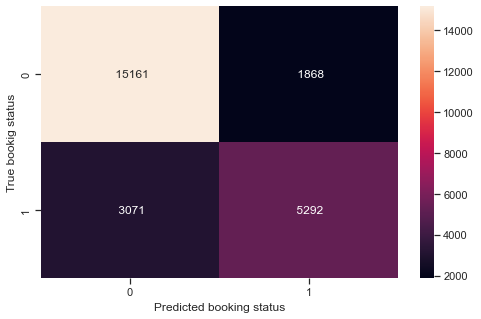

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
#creating a confusion matrix to plot the clasification for model with default 0.5 thredshold
pred_train_final= lg_final.predict(x_trainPval1)>0.5
pred_train_final=np.round(pred_train_final)
cm=confusion_matrix(y_train,pred_train_final)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,fmt=' ')
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status")
plt.show


In [128]:
error_train_percentage = (3071 + 1868) / x_trainPval1.shape[0] * 100
print(f"the total error is {np.round(error_train_percentage, 2)}%")

the total error is 19.45%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The ovearall total error is 19.45 for the train data, so 19.45 of the data are misclassified, that is, they are either false positives or false negatives.

In [129]:
# Let's check the performance of our model1 on train set
model_train_perf1 = model_performance_linear_regression(
    lg_final, x_trainPval1, y_train, threshold=0.5
)
model_train_perf1

Accuracy    Recall  Precision        F1
0   0.80549  0.632787   0.739106  0.681827

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The values with of model performance did not change. We can improve model perfomance by changing to an optimal threshold

In [130]:
# Let's check the performance of our model1 on test set
model_test_perf1 = model_performance_linear_regression(
    lg_final, x_testPval1, y_test, threshold=0.5
)
model_train_perf1

Accuracy    Recall  Precision        F1
0   0.80549  0.632787   0.739106  0.681827

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The performance is the same as the one we calculated before removing p_values, and it makes sense, since they only affect the interpretation of the model, not the prediction power.

##  Changing coefficient to odds 

The coefficients of the model are logarithm of the odds, log(odd). We can easily get the odds of the model by applying the exp function to each of them. 

The percentage change in odds is given as odds = (exp(coefficient) - 1) * 100


In [131]:
lg_final.params  # we need to apply the exp() to the predictor coefficient to find the probabilities.

const                            -916.055671
no_of_adults                        0.108672
no_of_children                      0.153376
no_of_weekend_nights                0.108664
no_of_week_nights                   0.041737
required_car_parking_space         -1.594389
lead_time                           0.015710
arrival_year                        0.452525
arrival_month                      -0.042384
repeated_guest                     -2.737373
no_of_previous_cancellations        0.228910
avg_price_per_room                  0.019158
no_of_special_requests             -1.469806
type_of_meal_plan_Meal Plan 2       0.165371
type_of_meal_plan_Not Selected      0.285897
room_type_reserved_Room_Type 2     -0.355533
room_type_reserved_Room_Type 4     -0.282081
room_type_reserved_Room_Type 5     -0.735404
room_type_reserved_Room_Type 6     -0.966536
room_type_reserved_Room_Type 7     -1.431731
market_segment_type_Corporate      -0.791357
market_segment_type_Offline        -1.786643
dtype: flo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Negative coefficients shows that the probability of cancel a booking decrease if the attribute increase. 
Positive coefficients shows that the probability of cancel a booking increase if the attribute increase.

In [132]:
# converting coefficients to odds
odds = np.exp(lg_final.params)
# finding the percentage change
perc_change_odds = (np.exp(lg_final.params) - 1) * 100


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [133]:
#Showing all values of the dataframe
pd.set_option("display.max_columns", None)
# create a data frame to show all the odds and percentage change per variable
pd.DataFrame(
    {"Odds": odds, "Change_odd%": perc_change_odds}, index=x_trainPval1.columns
).T


const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0      1.114797        1.165764              1.114787   
Change_odd% -100.0     11.479693       16.576355             11.478746   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042621                    0.203032   1.015834   
Change_odd%           4.262058                  -79.696755   1.583413   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.572277       0.958501        0.064740   
Change_odd%     57.227668      -4.149864      -93.525981   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257229            1.019342   
Change_odd%                     25.722876            1.934232   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229970                       1.179831   
Change_odd%              -77.002991                      17.983117   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.330956                        0.700800   
Change_odd%                       33.095592                      -29.920033   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.754213                        0.479312   
Change_odd%                      -24.578719                      -52.068815   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.380399                        0.238895   
Change_odd%                      -61.960146                      -76.110504   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.453229                     0.167522  
Change_odd%                     -54.677050                   -83.247835

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Let’s explained interpret the coefficients in terms of odds:
    
*Variable Number of adults: If we hold all the other features constant, an additional adult will increase the chances of a booking cancelation by 1.11 times, that would be a 11.48% increase in odds.

*Variable Number of children: If we hold all the other features constant, an additional child will increase the chances of a booking cancelation by 1.16 times, that would be a 16.57% increase in odds. 

*no_of_weekend_nights:  If we hold all the other features constant, an additional night will increase the chances of a booking cancelation by 1.11 times, that would be a 11.47% increase in odds.

*no_of_week_nights: If we hold all the other features constant, an additional night will increase the chances of a booking cancelation by 1.04 times, that would be a 4.26% increase in odds.

*required_car_parking_space: If we hold all the other features constant, requesting for parking space will decrease the chances of a booking cancelation by 0.02 times, that would be a 76.69% decrease in odds.

*lead_time:If we hold all the other features constant, an additional lead day will increase the chances of a booking cancelation by 1.01 times, that would be a 1.58% increase in odds.

*arrival_year:If we hold all the other features constant, an additional year will increase the chances of a booking cancelation by 1.57 times, that would be a 57.22% increase in odds.

*arrival_month:If we hold all the other features constant, an additional month(latest months of the year) will decrease the chances of a booking cancelation by 0.95 times, that would be a 4.14% decrease in odds.

*repeated_guest:If we hold all the other features constant, being a repeated guest in the hotel, will decrease the chances of a booking cancelation by 0.06 times, that would be a 93% decrease in odds.

*no_of_previous_cancellations: If we hold all the other features constant, an additional previous cancelation will increase the chances of a booking cancelation by 1.25 times, that would be a 25.722% increase in odds.

*avg_price_per_room:If we hold all the other features constant, an additional euro in the price per room,  will increase the chances of a booking cancelation by 1.01 times, that would be a 1.93% increase in odds.

*no_of_special_requests:If we hold all the other features constant, any additional request added will decrease the chances of a booking cancelation by 0.2 times, that would be a 77% decrease in odds.

*type_of_meal_plan_Meal Plan 2: If we hold all the other features constant, the odds of canceling a booking with type 2 meal are 1.1 greater than the bookings with meal type 1 (breakfast only), that is 17% more odds than type one meal.

*type_of_meal_plan_Not Selected: If we hold all the other features constant, the odds of canceling a booking with no meal plan selected are 1.3 greater than the bookings with meal type 1 (breakfast only), that is 33.9% more odds than type one meal.

*room_type_reserved_Room_Type2: If we hold all the other features constant, the odds of canceling a booking with room type 2 are 0.7 less than the bookings of a type 1 room, that is 29% less odds than room type 1.

*room_type_reserved_Room_Type4: If we hold all the other features constant, the odds of canceling a booking with room type 4 are 0.75 less than the bookings of a type 1 room, that is 24% less odds than room type 1

*room_type_reserved_Room_Type5: If we hold all the other features constant, the odds of canceling a booking with room type 5 are 0.47 less than the bookings of a type 1 room, that is 52% less odds than room type 1

*room_type_reserved_Room_Type6: If we hold all the other features constant, the odds of canceling a booking with room type 6 are 0.38 less than the bookings of a type 1 room, that is 61.9% less odds than room type 1

*room_type_reserved_Room_Type7: If we hold all the other features constant, the odds of canceling a booking with room type 7 are 0.23 less than the bookings of a type 1 room, that is 76% less odds than room type 1

*market_segment_type_Corporate: If we hold all the other features constant, the odds of canceling a booking made by the corporate segment are 0.54 lower than the bookings of a guest from online or aviation segment, that is 54% less odds.

*market_segment_type_Offline: If we hold all the other features constant, the odds of canceling a booking  made offline are 0.16 lower than the bookings of a guest from the online or aviation segment that is 83% less odds.


### Improving the model: ROC-AUC curve approach


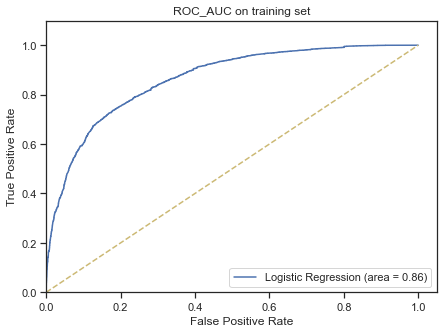

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [134]:
logit_roc_auc_train = roc_auc_score(y_train, lg_final.predict(x_trainPval1))
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(x_trainPval1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "y--")
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.10])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC_AUC on training set")
plt.legend(loc="lower right")
plt.show()


Auc_Rock graphshows the performance of  model1 by plotting the true positive rate and the false positive rate and we are using it to measure the entire area under the ROC curve.
The model seems to predict fine but we want to see if we can improve the model by changing the threshold, we are trying to maximize the area under the curve and the yellow line. 
The whole rectangle area would be 1, in the case of our model the area we get is 0.86 so it shows a fair performance.

In [135]:
# Optimal threshold as per AUC-ROC curve will be the one that maximize distance from the Roc curve and the the yellow line plotted.
# The optimal cut off would be where true positive rate(tpr) is high and false positive rate (fpr)is low
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(x_trainPval1))
optimal_idx = np.argmax(tpr - fpr)  # look for maximun value of the index
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # look for the threshold that give that maximun value
print(optimal_threshold_auc_roc)

0.371123564782238


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

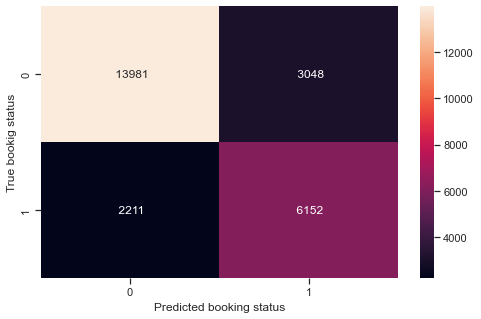

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:

#creating a confusion matrix to plot the clasification for model with optimal_threshold_auc_roc
pred_train_final= lg_final.predict(x_trainPval1)>optimal_threshold_auc_roc
pred_train_final=np.round(pred_train_final)
cm=confusion_matrix(y_train,pred_train_final)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,fmt=' ')
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status")
plt.show


In [137]:
error_train_percentage = (2211 + 3048) / x_trainPval1.shape[0] * 100
print(f"the total error is {np.round(error_train_percentage, 2)}%")

the total error is 20.71%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

When comparing the false positive (type I error) and the false negative (type II error) with the previous confusion matrix, we can appreciate that Type error has increase and type II has decreased. That will be noticed on the recall and precision scores that will change  in opposite directions.

In [138]:
# checking performance on training data
# Let's check the performance of our model1 on train set

model_auc_roc_train_perf = model_performance_linear_regression(
    lg_final, x_trainPval1, y_train, threshold=optimal_threshold_auc_roc
)
model_auc_roc_train_perf

Accuracy    Recall  Precision        F1
0  0.792888  0.735621   0.668696  0.700564

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [139]:
# Let's check the performance of our model1 on test set
model_auc_roc_test_perf = model_performance_linear_regression(
    lg_final, x_testPval1, y_test, threshold=optimal_threshold_auc_roc
)
model_auc_roc_test_perf

Accuracy    Recall  Precision        F1
0  0.796288  0.739353   0.667179  0.701414

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test and train performance values are very similar what is great. In comparison, with the previous model with default threshold (0.05), the accuracy decreased a tiny bit but there is a nice improvement on F1_score, that was our goal.

### Precision Recall curves approach

We are trying a different approach to improve the model by selectig the threshold to improve the classification model. We are using the Precision-Recall curve.


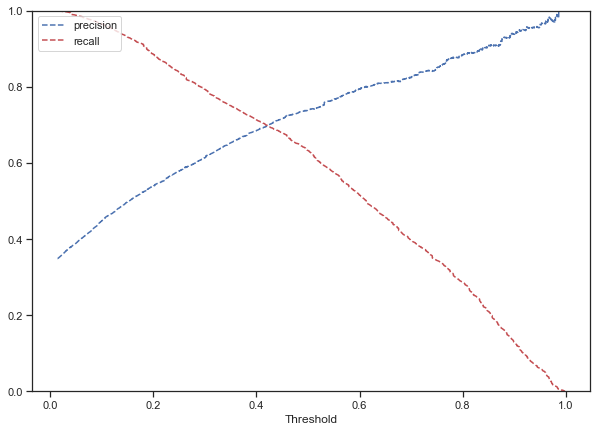

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [140]:
y_scores = lg_final.predict(x_trainPval1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "r--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

on the graphic representation we are plotting the two scores (recall and precision) along the different thresholds. We are looking for a value that maximize both at the same time
The optimal threshold is the one that maximize both recall and precision. The meeting poing of both curves will be the optimal threshold, in this case it is 0.42.

In [141]:
precision_recall_threshold = 0.42

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(close=None, block=None)>

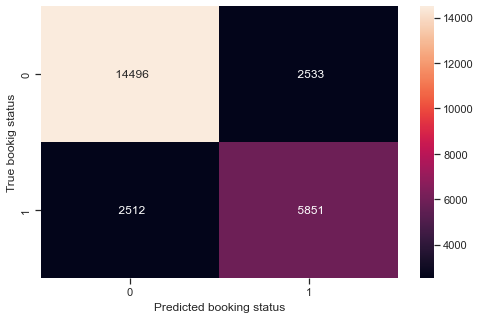

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [142]:
#let's check the confusion matrix using tprecision_recall_threshold

pred_train_final= lg_final.predict(x_trainPval1)>precision_recall_threshold
pred_train_final=np.round(pred_train_final)
cm=confusion_matrix(y_train,pred_train_final)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,fmt=' ')
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status")
plt.show


In [143]:
error_train_percentage = (2512 + 2533) / x_trainPval1.shape[0] * 100
print(f"the total error is {np.round(error_train_percentage, 2)}%")

the total error is 19.87%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Both classification error are more balanced, there ae similar number of false negative as false positive.

In [144]:
# checking performance on training data
# Let's check the performance of our model1 on train set

model_recall_precis_train_perf = model_performance_linear_regression(
    lg_final, x_trainPval1, y_train, threshold=precision_recall_threshold
)
model_recall_precis_train_perf

Accuracy    Recall  Precision        F1
0  0.801315  0.699629   0.697877  0.698752

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
# Let's check the performance of our model1 on test set
model_recall_precis_test_perf = model_performance_linear_regression(
    lg_final, x_testPval1, y_test, threshold=precision_recall_threshold
)
model_recall_precis_test_perf

Accuracy    Recall  Precision        F1
0  0.803547  0.703861   0.693621  0.698703

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The performance in both test and train is very similar so the model is not overfitted. All the scores are more balanced in this case and accuracy is better than in the previous classifications.

### Model performance comparisson for the  three possible thresholds performance.

In [146]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_train_perf1.T,
        model_auc_roc_train_perf.T,
        model_recall_precis_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-(0.5) Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-(0.5) Threshold  \
Accuracy                              0.805490   
Recall                                0.632787   
Precision                             0.739106   
F1                                    0.681827   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792888   
Recall                               0.735621   
Precision                            0.668696   
F1                                   0.700564   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801315  
Recall                               0.699629  
Precision                            0.697877  
F1                                   0.698752

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [147]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [model_test_perf1.T, model_auc_roc_test_perf.T, model_recall_precis_train_perf.T,],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-(0.5)Threshold",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.42 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-(0.5)Threshold  \
Accuracy                             0.804741   
Recall                               0.630892   
Precision                            0.729242   
F1                                   0.676511   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.796288   
Recall                               0.739353   
Precision                            0.667179   
F1                                   0.701414   

           Logistic Regression-0.42 Threshold  
Accuracy                             0.801315  
Recall                               0.699629  
Precision                            0.697877  
F1                                   0.698752

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

When checking the performance in both train and test set, we can see how the model with 0.42 threshold seems to be more balance and reliable. The train and test set are scores are closer, so it makes the model better. Also, our main goal was to maximize F1_score and the difference from the maximum f1_score that was reached with auc_roc approach is minimal.
The recall_precision_curve approach((0.42)   is  more stable, reliable and more harmonious.


## Final Model Summary

In [148]:
# model1(final model) parameters are shown below.
lg_final.params

const                            -916.055671
no_of_adults                        0.108672
no_of_children                      0.153376
no_of_weekend_nights                0.108664
no_of_week_nights                   0.041737
required_car_parking_space         -1.594389
lead_time                           0.015710
arrival_year                        0.452525
arrival_month                      -0.042384
repeated_guest                     -2.737373
no_of_previous_cancellations        0.228910
avg_price_per_room                  0.019158
no_of_special_requests             -1.469806
type_of_meal_plan_Meal Plan 2       0.165371
type_of_meal_plan_Not Selected      0.285897
room_type_reserved_Room_Type 2     -0.355533
room_type_reserved_Room_Type 4     -0.282081
room_type_reserved_Room_Type 5     -0.735404
room_type_reserved_Room_Type 6     -0.966536
room_type_reserved_Room_Type 7     -1.431731
market_segment_type_Corporate      -0.791357
market_segment_type_Offline        -1.786643
dtype: flo

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Performance: f1_score with precision_recall curve approach.

Classification threshold precision_recall curves approach= 0.42

In [149]:
Train_f1_score = models_train_comp_df["Logistic Regression-0.42 Threshold"][3]
Train_f1_score

0.6987520152863199

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [150]:
Test_f1_score = models_test_comp_df["Logistic Regression-0.42 Threshold"][3]
Test_f1_score

0.6987520152863199

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## B.Building a Decision Tree model

We are predicting the booking status with a building decision tree. The model may provide with a different model, and we will check performance to identify the model that provides with best prediction power.

In [151]:
# creating a copy of the dataset before variables transformations
df2 = df1.copy()
df2.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  booking_status  
0                       0               0  
1                       1               0  
2                       0               1  
3                       0               1  
4                       0               1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [152]:
# We apply get_dummies to the categories
cat_col = df2.select_dtypes("category").columns.tolist()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [153]:
df2 = pd.get_dummies(df2, columns=cat_col, drop_first=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:
# We use oneHotencoding with arrival_year
df2["arrival_year"] = df2["arrival_year"].replace([2017, 2018], [0, 1])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [155]:
#dividing data into predictor x and target variable y.

x = df2.drop(["booking_status"], axis=1)
y=df2["booking_status"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [156]:
x.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                           0        224             0             10   
1                           0          5             1             11   
2                           0          1             1              2   
3                           0        211             1              5   
4                           0         48             1              4   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0             2               0                             0   
1             6               0                             0   
2            28               0                             0   
3            20               0                             0   
4            11               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
0                       0                              0   
1                       1                              0   
2                       0                              0   
3                       0                              0   
4                       0                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                              0   
3                                  0  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [157]:
# splitting data into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=True
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
# checking x train and test data
x_tr = x_train.shape[0]
x_ts = x_test.shape[0]
print(f" The count of x train is {x_tr} and the count of x test is {x_ts}")

 The count of x train is 25392 and the count of x test is 10883


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [159]:
# checking class proportion on y_train
y_train.value_counts(normalize=True) * 100

0    67.06443
1    32.93557
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [160]:
# checking class proportion on y_test
y_test.value_counts(normalize=True) * 100

0    67.6376
1    32.3624
Name: booking_status, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Fitting the model

In [161]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(
    criterion="gini", random_state=1, class_weight={0: 0.33, 1: 0.67}
)
tree1.fit(x_train.astype(int), y_train.astype(int))

DecisionTreeClassifier(class_weight={0: 0.33, 1: 0.67}, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [162]:
col_feature = list(x.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Plotting the tree

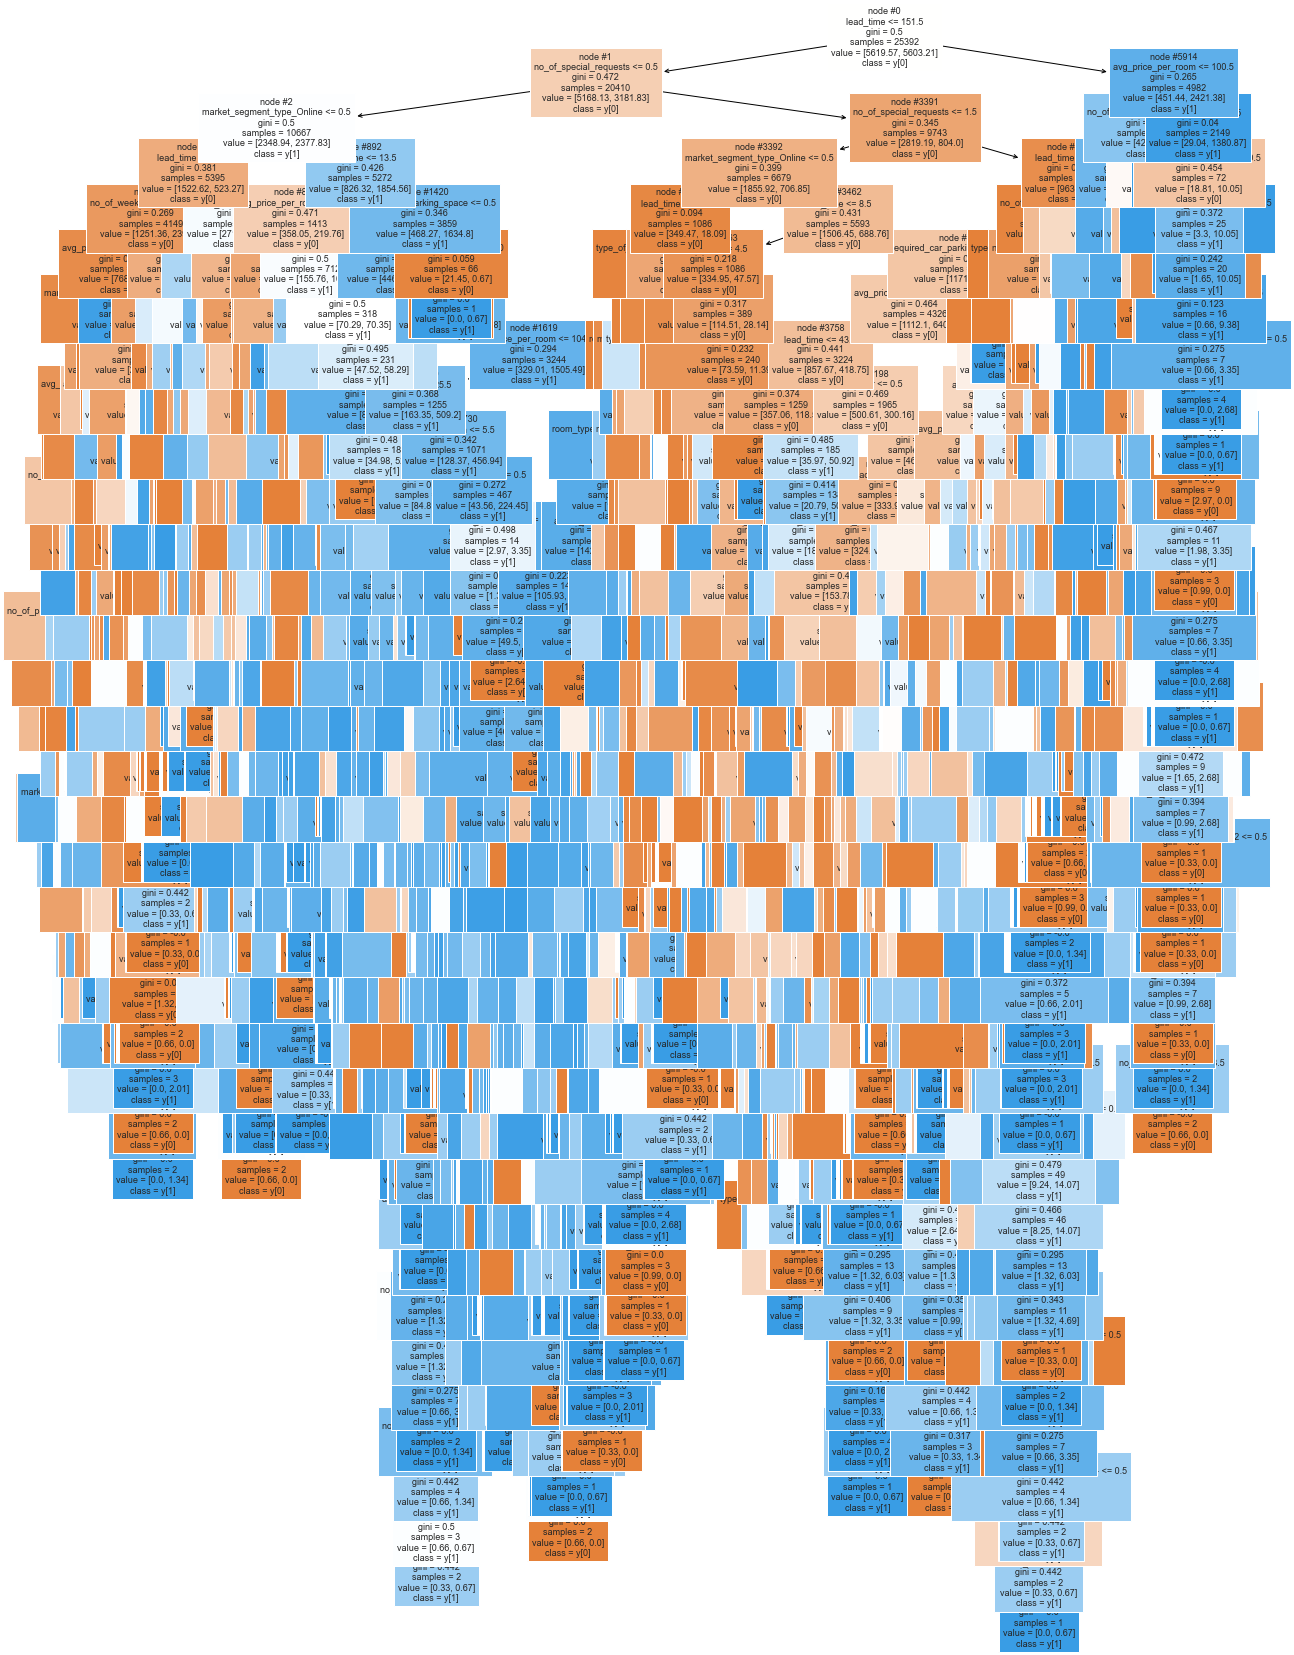

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    tree1,
    feature_names=col_feature,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

It is very difficult to read the full tree so we can use tree.export_text to see the information on each leaf of tree and the parent nodes.

In [164]:
print(tree.export_text(tree1, feature_names=col_feature, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 48.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [20.79, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  48.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 8
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [35.97, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [165]:
# importance of features in the tree building

print(
    pd.DataFrame(
        tree1.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                               Imp
lead_time                             3.565200e-01
avg_price_per_room                    1.466839e-01
market_segment_type_Online            9.533680e-02
no_of_special_requests                8.627486e-02
arrival_date                          7.901204e-02
arrival_month                         6.735876e-02
no_of_week_nights                     5.184353e-02
no_of_weekend_nights                  3.242017e-02
no_of_adults                          2.532371e-02
arrival_year                          1.285805e-02
market_segment_type_Offline           9.465899e-03
type_of_meal_plan_Not Selected        8.464057e-03
required_car_parking_space            7.581478e-03
no_of_children                        6.176242e-03
room_type_reserved_Room_Type 4        5.695297e-03
type_of_meal_plan_Meal Plan 2         2.737391e-03
room_type_reserved_Room_Type 2        1.977518e-03
room_type_reserved_Room_Type 5        1.061257e-03
market_segment_type_Corporate  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

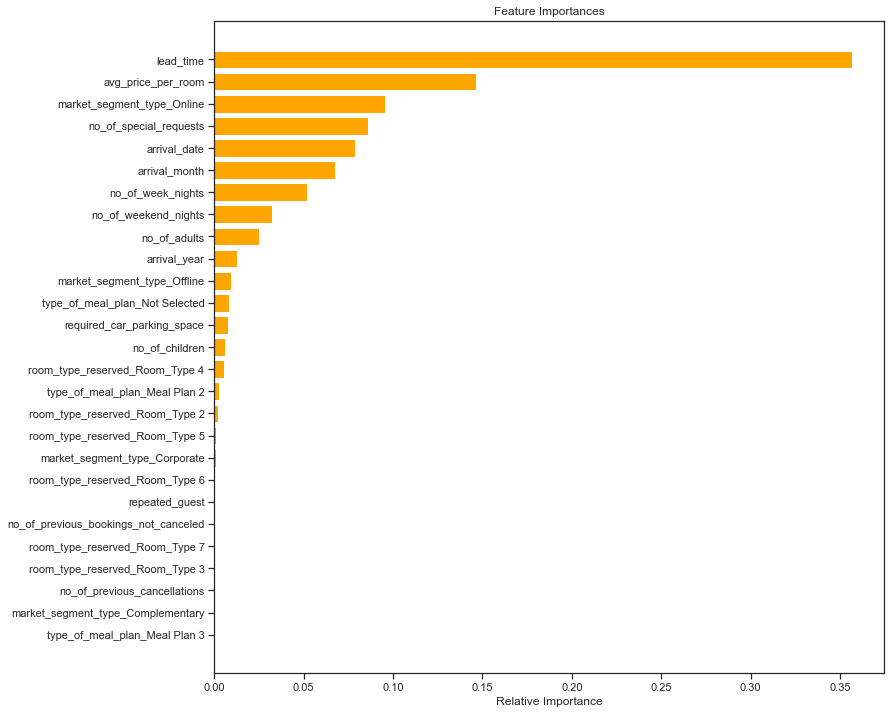

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [166]:
importances = tree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [col_feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

This model is taking 26 variables as the relevant to predict the booking cancellations. They are shown in order of importance or weight for the model tree1.
Lead_time, average room price, market segment Online, number of special requests and arrival date and month seem to be some the features with more weight but the model.
Since the model it grows until getting its maximum depth, it is obviously overfitted.


### Model Tree1 performance

As initially we discuss our main goal is maximize the fi_score, since is giving equal average to recall and precision.

We do not want to predict potential canceled bookings as true bookings and have to deal with opportunity cost of an empty room.
(Precision will lower false positive).

At the same time we do not want to predict a potential guest as a canceled booking because we will not be able to offer a good service and will affect the hotel booking rate and income in long term,(Recall score will lower the false negative.)
Since both are equally important for INNHotel chain, we need to focus on f1_score.


#### Plotting the confusion matrix

<function matplotlib.pyplot.show(close=None, block=None)>

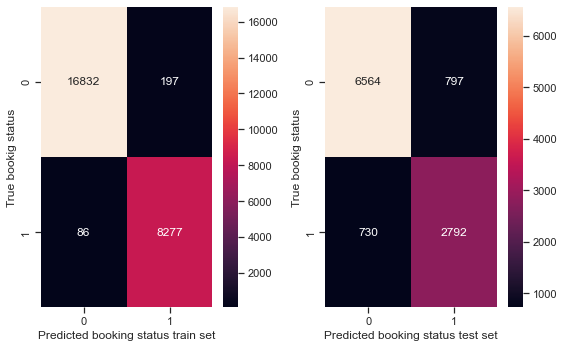

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [167]:
# let's check the confusion matrix using tprecision_recall_threshold
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
pred_train_tr1 = tree1.predict(x_train)
cm = confusion_matrix(y_train, pred_train_tr1)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status train set")
plt.subplot(1, 2, 2)
pred_test_tr1 = tree1.predict(x_test)
cm = confusion_matrix(y_test, pred_test_tr1)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status test set")
plt.tight_layout()
plt.show

In [168]:
error_train_matrix_perc = (86 + 197) / x_train.shape[0] * 100
print(f" the total error for train data is {np.round(error_train_matrix_perc,2)}%")

 the total error for train data is 1.11%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [169]:
error_test_matrix_perc = (797 + 730) / x_test.shape[0] * 100
print(f" the total error for test data is {np.round(error_test_matrix_perc,2)}%")

 the total error for test data is 14.03%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see how the false positive values and false negative are much greater on the second matrix(test set).
False positive and False negative shown by the  matrix for train set is 1.1% while the matrix error type and type 2 for the test set is 14%.

#### Cheking Recall score, f1_score score, precision score and accuracy

In [170]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [171]:
train_performance_tree1 = model_performance_classification_sklearn(
    tree1, x_train, y_train
)
train_performance_tree1

Accuracy    Recall  Precision        F1
0  0.988855  0.989717   0.976752  0.983192

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
test_performance_tree1 = model_performance_classification_sklearn(tree1, x_test, y_test)
test_performance_tree1

Accuracy    Recall  Precision        F1
0  0.859689  0.792731   0.777933  0.785262

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

We can see how the performance model differs among both datasets. I works much better on train set than on test set.
The accuracy, recall, precission and f1_score, all of them are almost  1 for the train set, that is a clear proof of overfitting, since the behavior of the test set is not as good by any means.

## Do we need to prune the tree?

After exhaustive analysis it is obvious that we need to prune the tree. We can try preparing to stop the tree from growing to its maximum with hyperparameters and also, we can try post pruning which it would be the opposite option. In post pruning we let the tree grow up to its maximum depth and then we trim the branches that are less relevant by using cost complexity method. 

**PRE PRUNING**: We use a combination of hyperparamenters to stop the tree before it reaches its maximun size. We will use cross validation to improve the model evaluation along with Gridsearch.

In [173]:
# Choose the type of classifier with balance data like the previous one to be able to compare
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from maximum depth, maximum of leaf nodes, and minumum of samples to split a node
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search using cross validation to ensure a better evaluation of the model
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.Train the data in the new estimator created
estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Plotting the model**

In [174]:
col_feature1 = list(x.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

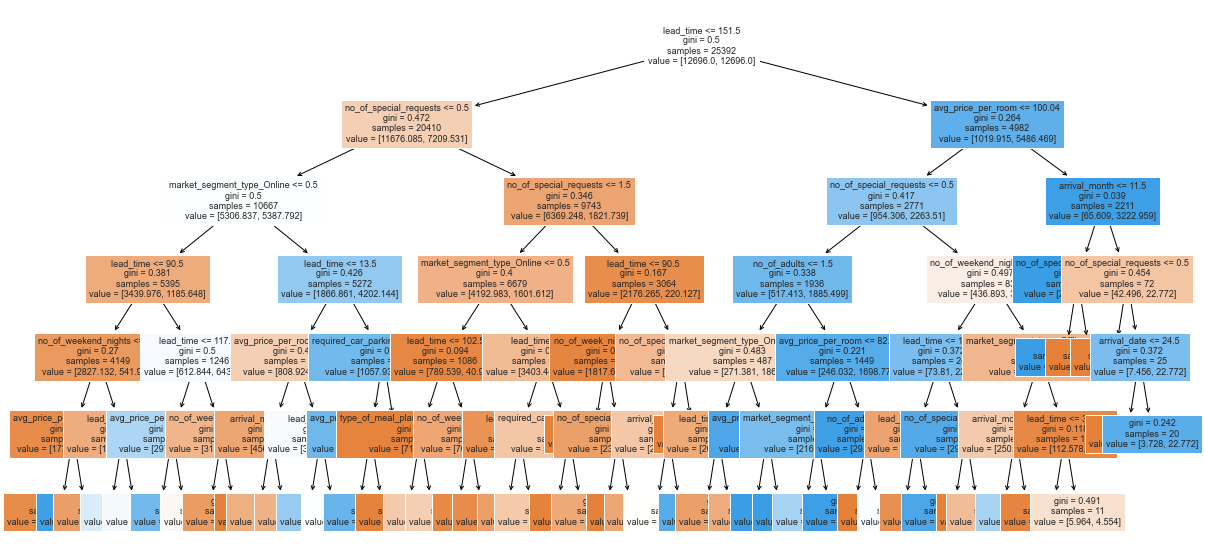

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [175]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=col_feature1,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [176]:
print(tree.export_text(estimator, feature_names=col_feature1, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- weights: [1736.39, 132.08] class: 0
|   |   |   |   |   |--- avg_price_per_room >  196.50
|   |   |   |   |   |   |--- weights: [0.75, 25.81] class: 1
|   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |--- lead_time <= 68.50
|   |   |   |   |   |   |--- weights: [960.27, 223.16] class: 0
|   |   |   |   |   |--- lead_time >  68.50
|   |   |   |   |   |   |--- weights: [129.73, 160.92] class: 1
|   |   |   |--- lead_time >  90.50
|   |   |   |   |--- lead_time <= 117.50
|   |   |   |   |   |--- avg_price_per_room <= 93.58
|   |   |   |   |   |   |--- weights: [214.72, 227.72] class: 1
|   |   |   |   |   |--- avg_price_per_room >  93.58
|   |   |   |   |   |   |--- weights: [82.76, 285.41] 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [177]:
# importance of features in the tree building

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.475546
market_segment_type_Online            0.184597
no_of_special_requests                0.169176
avg_price_per_room                    0.076233
no_of_adults                          0.026919
no_of_weekend_nights                  0.020589
arrival_month                         0.014125
required_car_parking_space            0.014101
market_segment_type_Offline           0.010007
no_of_week_nights                     0.006999
type_of_meal_plan_Not Selected        0.000950
arrival_date                          0.000760
no_of_previous_cancellations          0.000000
room_type_reserved_Room_Type 5        0.000000
arrival_year                          0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_res

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

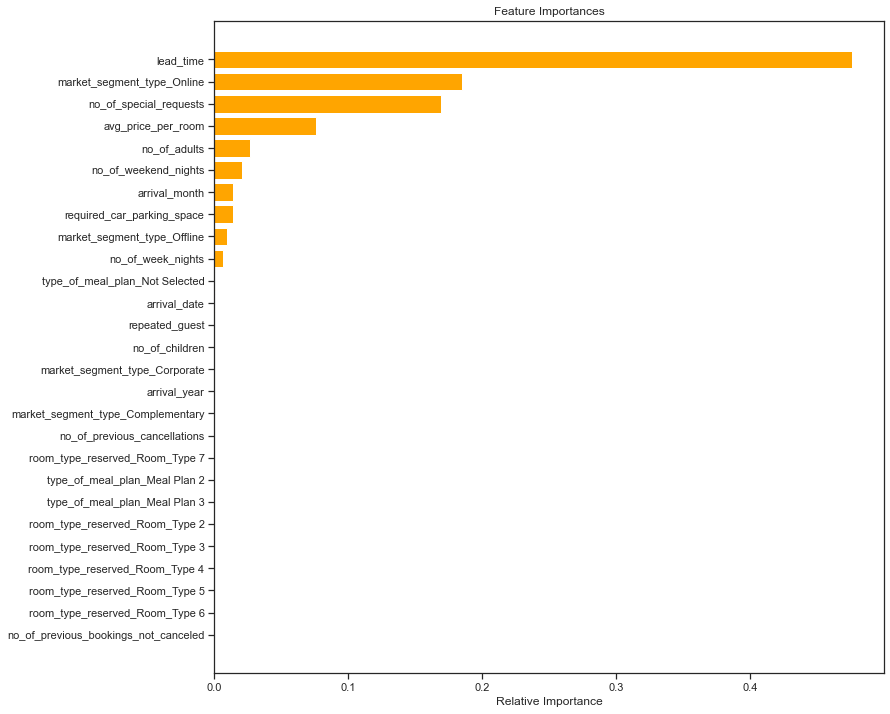

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [178]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [col_feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The model is much simplier than the previous one. The relevant features with greater weight from the previous model, tree1,are still on the top.  The stimator model only include 12 features
The top five features for this model are :lead_time,market_segment_type_Online,no_of_special_requests, avg_price_per_room  and no_of_adults. 
Lead time importance weight is almost the half of the total weight of the model features.
   

**Plotting confusion matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

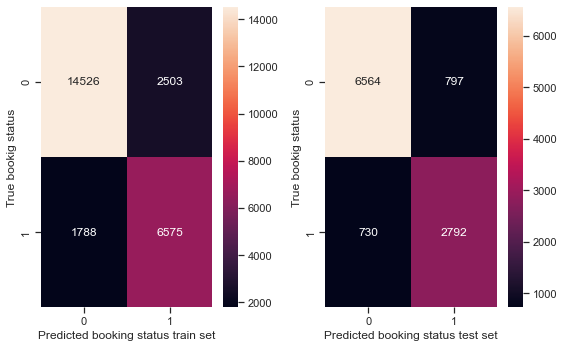

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [179]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
pred_train_trs = estimator.predict(x_train)
cm = confusion_matrix(y_train, pred_train_trs)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status train set")
plt.subplot(1, 2, 2)
pred_test_trs = tree1.predict(x_test)
cm = confusion_matrix(y_test, pred_test_trs)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status test set")
plt.tight_layout()
plt.show

The matrix confusion on train data and test data show a similar percentage of data error ( error typeI and error type II) for each set. This model seem more robust that the previous because the error percentage is similar so the model is not overfitted.

In [180]:
error_train_matrix_percS = (2503 + 1788) / x_train.shape[0] * 100
print(f" the total error for train data is {np.round(error_train_matrix_percS,2)}%")

 the total error for train data is 16.9%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
error_test_matrix_percS = (730 + 797) / x_test.shape[0] * 100
print(f" the total error for test data is {np.round(error_test_matrix_percS,2)}%")

 the total error for test data is 14.03%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking performance**

In [182]:
train_performance_est = model_performance_classification_sklearn(
    estimator, x_train, y_train
)
train_performance_est

Accuracy    Recall  Precision        F1
0   0.83101  0.786201   0.724278  0.753971

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [183]:
test_performance_est = model_performance_classification_sklearn(
    estimator, x_test, y_test
)
test_performance_est

Accuracy    Recall  Precision        F1
0  0.834972  0.783362   0.727584  0.754444

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The model performance on the test set has improve a bit but the  train performance is much lower this time. Both data sets are giving similar values for accuracy, recall, precision and f1.The model is not overfitte.
In our specific case we are focusing on f1_score and we can tell that is a bit lower that the previous model but it is ok, because this model is more reliable than tree1, and the prediction power is better too.

**POST PRUNING/ cost complexity**

We are going to apply cost complexity pruning to trim the branches of the tree. The cost complexity pruning is based on ccp_alpha. 
Cost-complexity pruning is based on the idea of first pruning those subtrees lead to the smallest increase in error on the training data. ccp_alpha is the measure of the average error increase when a section of the tree trimmed.
The maximun ccp alpha is the one in which the tree is only the root node.


In [184]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [185]:
# As we can see the maximum impurity of alpha is 0.5 (gini impurity)
ccp_alphas_df = pd.DataFrame(path)
ccp_alphas_df

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1837  8.901596e-03    0.328058
1838  9.802243e-03    0.337860
1839  1.271875e-02    0.350579
1840  3.412090e-02    0.418821
1841  8.117914e-02    0.500000

[1842 rows x 2 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Plotting the alphas vs impurities dataframe

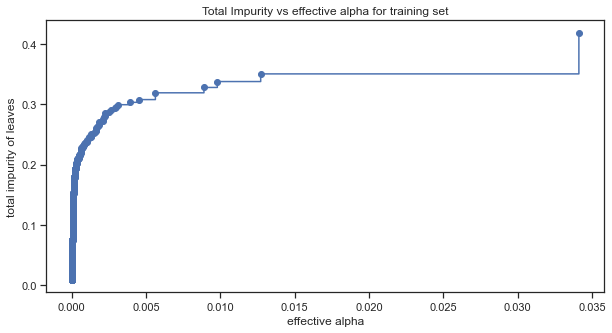

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [186]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

The bigger the effective alpha, the more impurity we get. The maximum alpha is the one such leave the tree on the root node

In [187]:
# Create a data frame with different models according to their alpha
clfs = []  # creating empty list to store the different for loop outcomes
# for loop to fit the different classifiers according to their alphas
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(x_train, y_train)
    clfs.append(clf)  # append the result of the fitting to the clfs list
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.08117914389136949


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

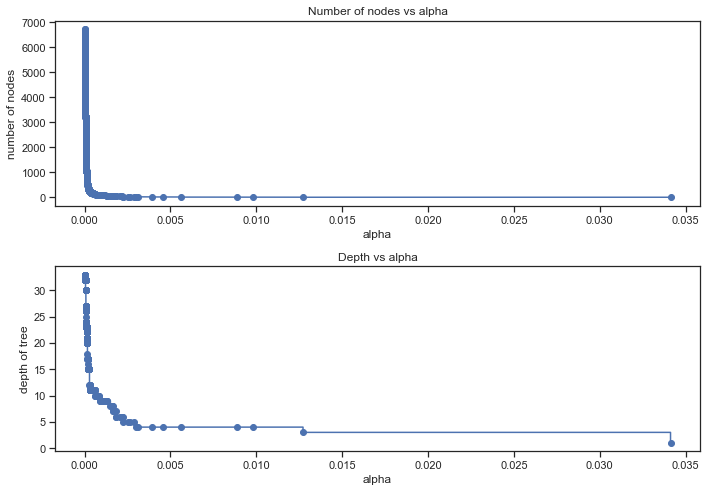

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
# removing the last fitted classifier and last alpha, since that would be the root node, so it has not predictive value .
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]  # counting number of nodes
depth = [
    clf.tree_.max_depth for clf in clfs
]  # calculating depth for each possible model depending on its alpha
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(
    ccp_alphas, node_counts, marker="o", drawstyle="steps-post"
)  # plotting the alphas and number of nodes
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(
    ccp_alphas, depth, marker="o", drawstyle="steps-post"
)  # plotting the model depth and its corresponding alpha
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We are comparing for the different possible models according to their alphas, the number of nodes and the depht of the tree model. The higher the effective alpha, the lower is the depth of the tree and the number of nodes.

In [189]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [190]:
# creating a dataframe with both, train and test f1_score accoriding to each the model alpha
f1_df_train = pd.Series(f1_train)
f1_df_test = pd.Series(f1_test)
f1_score_data = pd.concat([f1_df_train, f1_df_test], axis=1)
f1_score_data.columns = ["f1_train", "f1_test"]

f1_score_data.sample(3)

f1_train   f1_test
226  0.989595  0.795400
438  0.989529  0.796185
362  0.989595  0.795400

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Since we are interested in maximize F1_score for train and test set. We need to find the alpha in with both lines of f1_score, for test and train meet. 
This will be the alpha that will optimize the model

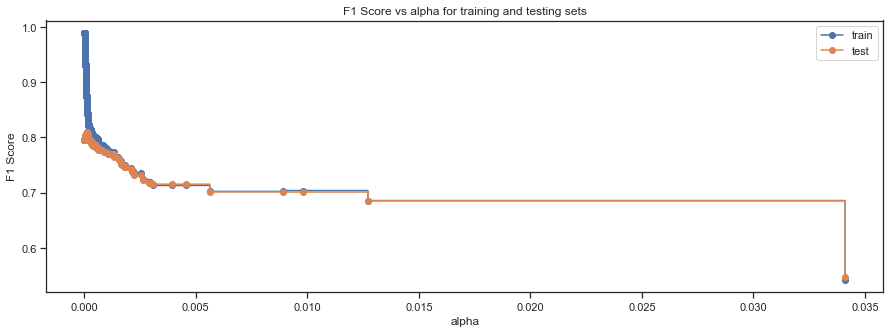

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [191]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

When the alpha is zero, we can see how the f1_score for the train set is 100% and for test set 80%, that would mean the model is overfitted when alpha equals 0. when moving along the line the values of alpha increase and f1_score for both data sets converge, so both plots, the train and test line, overlap. The alpha value for our best model, the one that maximize both train and test, is around 0.005 was we can see in the graphic representation.

**Fitting the best model**

In [192]:
# the model that includes the alpha with better f1_score is calculated on test data and is called best model
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.00012267633155167034,
                       class_weight='balanced', random_state=1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [193]:
col_feature2 = list(x.columns)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

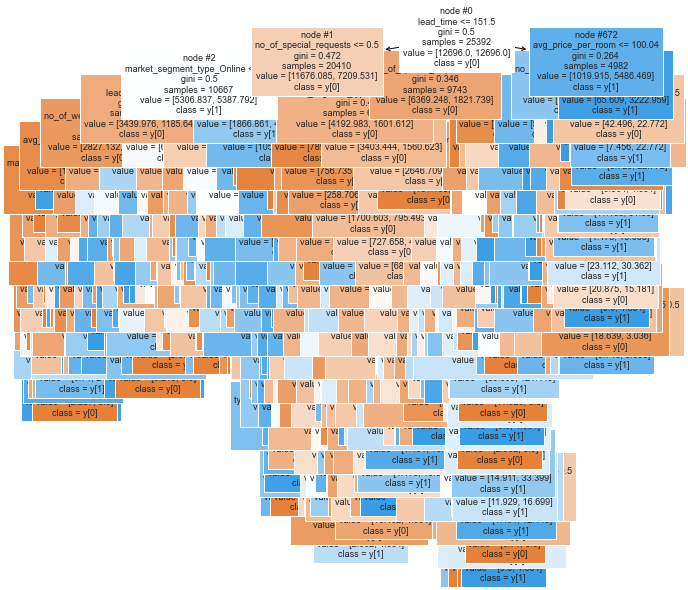

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [194]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=col_feature2,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [195]:
print(tree.export_text(best_model, feature_names=col_feature1, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |   |

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [196]:
# importance of features in the tree building

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time                             0.393330
market_segment_type_Online            0.134240
avg_price_per_room                    0.124311
no_of_special_requests                0.120715
arrival_month                         0.058473
arrival_date                          0.035290
no_of_week_nights                     0.027727
no_of_weekend_nights                  0.027386
no_of_adults                          0.025462
arrival_year                          0.018917
market_segment_type_Offline           0.012383
required_car_parking_space            0.010061
type_of_meal_plan_Not Selected        0.005078
room_type_reserved_Room_Type 4        0.001902
room_type_reserved_Room_Type 6        0.000962
market_segment_type_Corporate         0.000815
room_type_reserved_Room_Type 2        0.000809
type_of_meal_plan_Meal Plan 2         0.000660
room_type_reserved_Room_Type 5        0.000576
no_of_children                        0.000559
repeated_gues

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

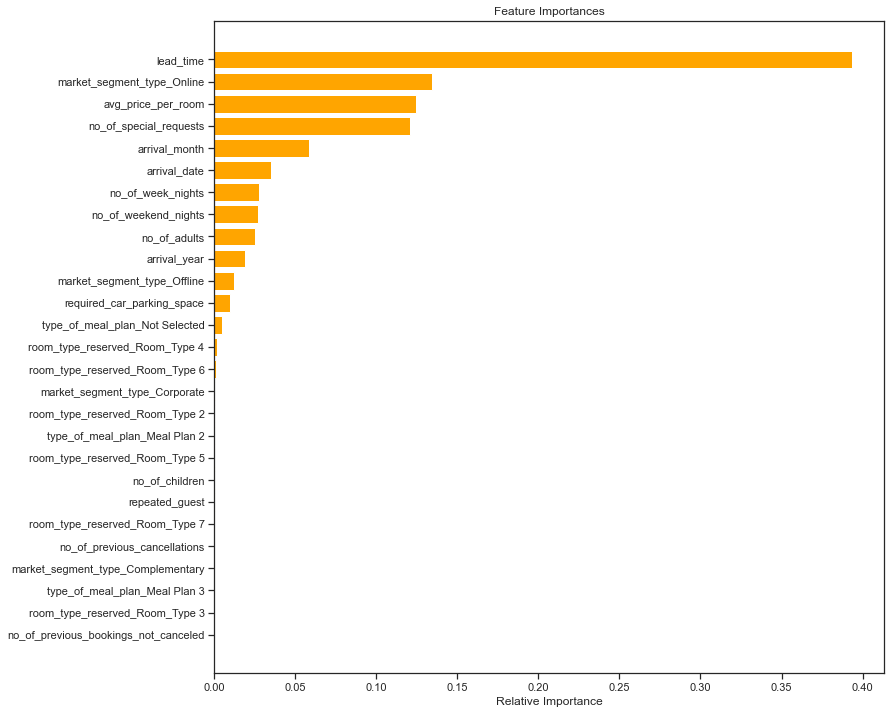

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [197]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="orange", align="center")
plt.yticks(range(len(indices)), [col_feature[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For the post-pruning model, the features taking into consideration are twenty-one, but for some of them the weight in the model is very low, such as repeated guests or number of children.
The top predictors seem to be the same as in the previous model. The weight that this model is giving to lead times is the highest, followed by segment Online, average price per room, special requests, arrival month and date. Those are the most important features according to the model.
 

**Confusion matrix**

<function matplotlib.pyplot.show(close=None, block=None)>

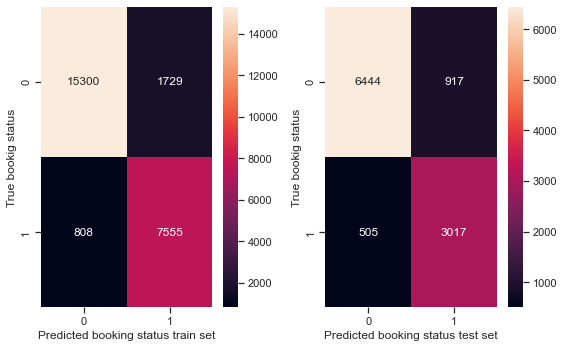

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [198]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
pred_train_trbm = best_model.predict(x_train)
cm = confusion_matrix(y_train, pred_train_trbm)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status train set")
plt.subplot(1, 2, 2)
pred_test_trbm = best_model.predict(x_test)
cm = confusion_matrix(y_test, pred_test_trbm)
sns.heatmap(cm, annot=True, fmt="")
plt.ylabel("True bookig status")
plt.xlabel("Predicted booking status test set")
plt.tight_layout()
plt.show

In [199]:
error_train_matrix_percbm = (808 + 1729) / x_train.shape[0] * 100
print(
    f" the total error is for train data  is {np.round(error_train_matrix_percbm,2)}%"
)

 the total error is for train data  is 9.99%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [200]:
error_test_matrix_percbm = (505 + 917) / x_test.shape[0] * 100
print(
    f" the total error is for train data  is {np.round(error_test_matrix_percbm ,2)}%"
)

 the total error is for train data  is 13.07%


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The error typeI and type II for the test set and train set in percentage are 9% and 13% respectivally. It seems that the model perform better on train data.

**Performance best model**

In [201]:
train_performance_bm = model_performance_classification_sklearn(
    best_model, x_train, y_train
)
train_performance_bm

Accuracy    Recall  Precision        F1
0  0.900087  0.903384   0.813766  0.856236

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
test_performance_bm = model_performance_classification_sklearn(
    best_model, x_test, y_test
)
test_performance_bm

Accuracy    Recall  Precision        F1
0  0.869337  0.856616   0.766904  0.809281

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The f1_score in test set and train set are better than for the previous model. The scores are showing a better performance on the train data than the test set. Overall it seem that we have good f1_score, accuracy, recall and precision in both models.

### Model Performance Comparison and Conclusions for model Tree1, model estimator and best model.


let's compare the three models.

In [203]:
# training performance comparison

models_train_comp_df = pd.concat(
    [train_performance_tree1.T, train_performance_est.T, train_performance_bm.T,],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.988855                     0.831010   
Recall                  0.989717                     0.786201   
Precision               0.976752                     0.724278   
F1                      0.983192                     0.753971   

           Decision Tree (Post-Pruning)  
Accuracy                       0.900087  
Recall                         0.903384  
Precision                      0.813766  
F1                             0.856236

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [204]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [test_performance_tree1.T, test_performance_est.T, test_performance_bm.T,], axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.859689                     0.834972   
Recall                  0.792731                     0.783362   
Precision               0.777933                     0.727584   
F1                      0.785262                     0.754444   

           Decision Tree (Post-Pruning)  
Accuracy                       0.869337  
Recall                         0.856616  
Precision                      0.766904  
F1                             0.809281

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The best model is the one we built by applying cost complexity post pruning to the model. The f1_score is 0.80 for test set and 0.85 for train set, the best f1_score of all models.
The train and test set values are very close so we can make sure this model is not overfitted. 


## Actionable Insights 



INNHOTEL group is facing a booking cancellations problem for long time, and this is representing a great cost for the hotel business.

As we could see the amount bookings was increasing in certain months on the data, the actual guest’s number was much smaller.
It is crucial for INNHotel to try to predict what time of bookings are more likely to be cancelled and who are going to be actual guests.

The opportunity cost of dealing with a big number of empty rooms along with fixed cost of the hotel maintenance and business promotion could lead to a decline of the hotel chain annual profit, creating fiction between the management and the stockholders.

On the other hand, if the hotel is not ready to give a decent service to their guests because the management is unable to plan the number of customers, the clients may experience low satisfaction and may affect INNHotel sales/ incomes in the long run.

Since the may market segment of the hotel is the “online segment’, rating is one of the most valuable resources for the online commerce and it takes role on the online shopping-booking decisions. As we can expect, a bad customer service experience will generate bad customer reviews and will affect the hotel group business reputation and group incomes.
Either situation anticipate a bad result for the Hotel group profitability in the long run.

We have been able to create two different models that would predict the number of booking cancellations by using logistic regression and decision tree classification. They both show similar F1_score that was our most relevant performance tool, but our decision tree model power prediction seems to be a little bit better.

Both models consider than the lead time, average price per room, the online segment and the moth of arrival affect positively the booking cancellations, also the greater the number of nights booked (especially weekends), and number or customers per booking, the more likely it the client to cancel. Not being a previous guest from the hotel, would make the booking more likely to be cancelled as well.

All the mentioned factors clearly show a price sensitive customer. The online segment is the main segment of the hotel and obviously is more price sensitive than the corporate or offline market.

The attributes that seem to reduce booking cancellations according to the models and based on the data, are the higher number of requests, the breakfast meal type, being a recurrent customer, customers that asked for parking space and being only one guest. The booking that contains any of this attribute will be more likely to keep the reservation.

It is obvious that some of them are linked to a type of customer segment. Online segments tend to be deal with a bigger variation of prices. The number of requests will increase the price of the room. requesting parking spot is also a type of request. We could consider requesting for a parking space another type of additional request.

 
The summer vacation months are the ones that have more effective guests, so their rate of cancellation is lower. 
The second part of the year and specially end of September, October, November are the months with bigger number or canceled bookings. The average price per room is also disperse, finding bigger difference in prices. 


## Recommendations



**What can of cancellation policies can the hotel apply?**

The first step to avoid customer booking cancellation is making a more rigid policy of cancellations.
Late cancellation should be highly penalized, not allowing customers to get any refund unless is due to sickness or any other exceptional situation.
Also, to prevent cost of opportunity, the hotel can only charge a fee if a cancellation is made during the low season.

**Additional recommendations**

Since we are dealing with a highly sensitive sector, it is important to offer value to the customers. The hotel could add breakfast included for every room type during the whole year. Customers appreciate this.


For the moths with greater number of cancellations, like October or September, the hotel could launch a discount campaign to attract families or bigger groups. Free shuttle service, a babysitter service for parents that want to go out for dinner or offering wine tasting or gastronomy tours periodically.


Another way to improve the business and brand reputation would be to host conferences to improve business management or marketing promotion techniques, this way the hotel will be gaining a place in the corporative sector.
 other recommedations would you suggest to the hotel?